<a href="https://colab.research.google.com/github/NDDV/House-Price-predict/blob/main/HousePrice_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#ApartmentTrading data

In [4]:
#Đọc dữ liệu
at_data = pd.read_csv("/content/drive/MyDrive/Data DA/ApartmentTrading.csv", encoding='utf8').iloc[:, 1:]
at_data.head(5)

,dien_tich,huong_ban_cong,phong_ngu,id_thanh_pho,ten_thanh_pho,id_quan,ten_quan,so_tang,mat_tien,noi_that,...,gia,gia_m2,du_an,project_name,id_duong,ten_duong,do_rong_duong,do_rong_duong_ml,id_phuong,ten_phuong
0,75.0,NaN,2.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,NaN,NaN,NaN,...,6300.0,84.000000,NaN,NaN,5e958ee8208d0d6d7648f9d1,Phố Ngọc Khánh,NaN,NaN,5e5501cbeb80a7245175e0eb,Phường Ngọc Khánh
1,115.0,Đông Nam,3.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,NaN,NaN,NaN,...,10250.0,89.130435,NaN,NaN,5e958ee8208d0d6d7648f9d1,Phố Ngọc Khánh,NaN,NaN,5e5501cbeb80a7245175e0eb,Phường Ngọc Khánh
2,100.0,NaN,2.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,1.0,NaN,NaN,...,2600.0,26.000000,NaN,NaN,5e958ee8208d0d6d7648f9da,Phố Thành Công Bắc,NaN,NaN,5e5501cbeb80a7245175e0ee,Phường Thành Công
3,30.0,NaN,2.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,2.0,NaN,NaN,...,3500.0,116.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,72.0,NaN,2.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,3.0,NaN,NaN,...,1750.0,24.305556,NaN,NaN,5e958ee8208d0d6d7648f9bf,Phố Đặng Dung,NaN,NaN,5e5501cbeb80a7245175e0e7,Phường Quán Thánh


In [5]:
#Đọc thông tin dữ liệu
at_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37259 entries, 0 to 37258
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dien_tich         36303 non-null  float64
 1   huong_ban_cong    12510 non-null  object 
 2   phong_ngu         26873 non-null  float64
 3   id_thanh_pho      37259 non-null  object 
 4   ten_thanh_pho     37259 non-null  object 
 5   id_quan           37259 non-null  object 
 6   ten_quan          37259 non-null  object 
 7   so_tang           2390 non-null   float64
 8   mat_tien          336 non-null    float64
 9   noi_that          14294 non-null  object 
 10  huong_nha         15144 non-null  object 
 11  so_do             16172 non-null  object 
 12  lat               37217 non-null  float64
 13  long              37217 non-null  float64
 14  gia               32136 non-null  float64
 15  gia_m2            32090 non-null  float64
 16  du_an             8557 non-null   object

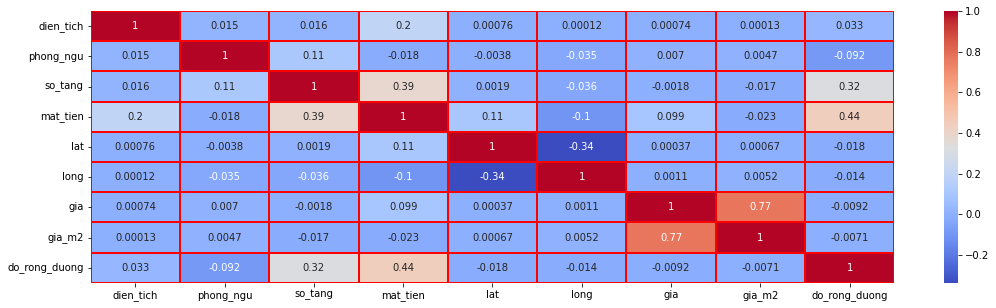

In [6]:
plt.figure(figsize=(18,5))
sns.heatmap(at_data.corr(), annot=True, lw = 1, linecolor="r",cmap="coolwarm")

In [7]:
print("Trước: ",at_data.ten_quan.unique())
at_data["ten_quan"].replace({"Ba Đình": "Quận Ba Đình", 
                       "Hà Đông": "Quận Hà Đông", 
                       "Đan Phượng": "Huyện Đan Phượng", 
                       "Hoài Đức": "Quận Hoài Đức", 
                       "Ba Vì": "Huyện Ba Vì", 
                       'Tây Hồ': 'Quận Tây Hồ', 
                       "Long Biên": "Quận Long Biên", 
                       "Cầu Giấy": "Quận Cầu Giấy", 
                       "Đống Đa": "Quận Đống Đa", 
                       "Hai Bà Trưng": "Quận Hai Bà Trưng", 
                       "Hoàng Mai": "Quận Hoàng Mai", 
                       "Thanh Xuân": "Quận Thanh Xuân", 
                       'Đông Anh' : 'Huyện Đông Anh', 
                       'Gia Lâm' : 'Huyện Gia Lâm', 
                       'Thanh Trì' : 'Huyện Thanh Trì',
                       "Nam Từ Liêm": "Quận Nam Từ Liêm",
                       "Bắc Từ Liêm": "Quận Bắc Từ Liêm",}
                      , inplace=True)
print("Sau: ",at_data.ten_quan.unique())

Trước:  ['Quận Ba Đình' 'Ba Đình' 'Quận Hà Đông' 'Hà Đông' 'Ba Vì'
 'Huyện Đan Phượng' 'Đan Phượng' 'Huyện Hoài Đức' 'Hoài Đức'
 'Huyện Quốc Oai' 'Huyện Thạch Thất' 'Huyện Chương Mỹ' 'Huyện Thanh Oai'
 'Huyện Thường Tín' 'Quận Hoàn Kiếm' 'Quận Tây Hồ' 'Tây Hồ'
 'Quận Long Biên' 'Long Biên' 'Quận Cầu Giấy' 'Cầu Giấy' 'Quận Đống Đa'
 'Đống Đa' 'Quận Hai Bà Trưng' 'Hai Bà Trưng' 'Quận Hoàng Mai' 'Hoàng Mai'
 'Quận Thanh Xuân' 'Thanh Xuân' 'Huyện Sóc Sơn' 'Huyện Đông Anh'
 'Đông Anh' 'Huyện Gia Lâm' 'Gia Lâm' 'Quận Nam Từ Liêm' 'Nam Từ Liêm'
 'Huyện Thanh Trì' 'Thanh Trì' 'Quận Bắc Từ Liêm' 'Bắc Từ Liêm'
 'Huyện Mê Linh' 'Huyện Phú Xuyên']
Sau:  ['Quận Ba Đình' 'Quận Hà Đông' 'Huyện Ba Vì' 'Huyện Đan Phượng'
 'Huyện Hoài Đức' 'Quận Hoài Đức' 'Huyện Quốc Oai' 'Huyện Thạch Thất'
 'Huyện Chương Mỹ' 'Huyện Thanh Oai' 'Huyện Thường Tín' 'Quận Hoàn Kiếm'
 'Quận Tây Hồ' 'Quận Long Biên' 'Quận Cầu Giấy' 'Quận Đống Đa'
 'Quận Hai Bà Trưng' 'Quận Hoàng Mai' 'Quận Thanh Xuân' 'Huyện Sóc Sơn'
 'Huyện 

In [8]:
print("Trước: ",at_data.huong_nha.unique())
at_data["huong_nha"].replace({"Tây-Bắc": "Tây Bắc", 
                       "Đông-Nam": "Đông nam", 
                       "Đông-Bắc": "Đông Bắc", 
                       "Tây-Nam": "Tây Nam",}
                      , inplace=True)
print("Sau: ",at_data.huong_nha.unique())

Trước:  [nan 'Tây Bắc' 'Nam' 'Đông' 'Đông Nam' 'Tây' 'Bắc' 'Tây-Bắc' 'KXĐ'
 'Đông-Nam' 'Đông-Bắc' 'Tây-Nam' 'Đông Bắc' 'Tây Nam' 'Đông nam']
Sau:  [nan 'Tây Bắc' 'Nam' 'Đông' 'Đông Nam' 'Tây' 'Bắc' 'KXĐ' 'Đông nam'
 'Đông Bắc' 'Tây Nam']


In [9]:
#Đổi các giá trị nan thành giá trị có thể cho máy học
def replaceNAN(df, ten_cot, gia_tri):
  if df[ten_cot].isna().sum() != 0:
    print("Cột '",ten_cot,"' đã chuyển đổi",df[ten_cot].isna().sum(),"giá trị nan thành:",gia_tri)
    df_doi = df.loc[:,(ten_cot)]
    df_doi = df_doi.fillna(gia_tri, inplace=True)
  else:
    print("Cột '",ten_cot,"' không có giá trị nan")

def removeNAN(df, ten_cot):
  if df[ten_cot].isna().sum() != 0:
    print("Cột '",ten_cot,"' đã xóa giá trị nan")
    df.dropna(subset = [ten_cot],inplace = True)
  else:
    print("Cột '",ten_cot,"' không có giá trị nan")

In [10]:
replaceNAN(at_data, 'so_do', 'không')

Cột ' so_do ' đã chuyển đổi 21087 giá trị nan thành: không


In [11]:
for i in at_data['so_do'].unique():
  if i != "không":
    at_data["so_do"].replace({i: "có"}, inplace=True)
    print("Chuyển ",i," Thành công")

Chuyển  Sổ đỏ chính chủ  Thành công
Chuyển  Đã có sổ  Thành công
Chuyển  Sổ hồng/ Sổ đỏ  Thành công
Chuyển  Sổ đỏ  Thành công
Chuyển  Sổ hồng  Thành công
Chuyển  Pháp lý rõ ràng, sở hữu 50 năm rồi CĐT gia hạn tiếp cho khách hàng  Thành công
Chuyển  Đã có sổ đỏ.  Thành công
Chuyển  Có sổ  Thành công
Chuyển  Sở hữu 50 năm, pháp lý rõ ràng.  Thành công
Chuyển  Sổ đỏ.  Thành công
Chuyển  Đã có sổ đỏ chính chủ.  Thành công
Chuyển  Sổ đỏ chính chủ.  Thành công
Chuyển  Giấy tờ hợp lệ  Thành công
Chuyển  Căn hộ đã có sổ dfor.  Thành công
Chuyển  Sổ đỏ đẹp như hoa hậu, chờ giao dịch.  Thành công
Chuyển  Sổ đỏ sở hữu lâu dài vĩnh viễn.  Thành công
Chuyển  Sổ đỏ sở hữu 50 năm.  Thành công
Chuyển  Sở hữu vĩnh viễn, pháp lý rõ ràng  Thành công
Chuyển  Sở hữu 50 năm pháp lý rõ ràng, xong CĐT gia hạn sử dụng tiếp  Thành công
Chuyển  Sở hữu lâu dài, pháp lý hoàn thiện rõ ràng  Thành công
Chuyển  Có sổ đỏ  Thành công
Chuyển  sổ đỏ  Thành công
Chuyển  Sổ hồng, pháp lý rõ ràng  Thành công
Chuyển  Sổ đỏ c

In [12]:
at_data['noi_that'] = at_data['noi_that'].fillna('trống')

In [13]:
for i in at_data['noi_that']:
  if i != "trống":
    if "tặng" in i:
      at_data["noi_that"].replace({i: "tặng"}, inplace=True)
      print("Chuyển ",i," Thành công")
    elif "Tặng" in i:
      at_data["noi_that"].replace({i: "tặng"}, inplace=True)
      print("Chuyển ",i," Thành công")
    elif "cao cấp" in i:
      at_data["noi_that"].replace({i: "cao cấp"}, inplace=True)
      print("Chuyển ",i," Thành công")
    elif "Cao cấp" in i:
      at_data["noi_that"].replace({i: "cao cấp"}, inplace=True)
      print("Chuyển ",i," Thành công")
    else:
      at_data["noi_that"].replace({i: "đầy đủ"}, inplace=True)
      print("Chuyển ",i," Thành công")

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Chuyển  nội thất: tủ lạnh điều hòa , ti vi , lò vi sóng, bàn ghế giường tủ, nóng lạnh, thiết bị vệ sinh, ánh sáng... chỉ việc sách valy về ở  Thành công
Chuyển  Nội thất bàn giao theo tiêu chuẩn CĐT Vinhomes: Điều hòa Multi 2 chiều Hoàn thiện trần thạch cao, sàn ốp gạch, tường nhà Hệ thống chiếu sáng Thiết bị vệ sinh cao cấp TOTO Chuông hình thông minh  Thành công
Chuyển  đầy đủ  Thành công
Chuyển  đầy đủ  Thành công
Chuyển  Full nội thất đẹp + chất lượng.  Thành công
Chuyển  đầy đủ  Thành công
Chuyển  đầy đủ  Thành công
Chuyển  đầy đủ  Thành công
Chuyển  đầy đủ  Thành công
Chuyển  - Điều hòa - Nóng lạnh - Full thiết bị vệ sinh - Tường trần thạch cao.  Thành công
Chuyển  bàn giao thô hoàn thiện mặt ngoài  Thành công
Chuyển  cơ bản có bếp , điều hòa , rèm , nóng lạnh , giường , tủ  Thành công
Chuyển  đầy đủ  Thành công
Chuyển  Nội thất bàn giao chủ đầu tư.  Thành công
Chuyển  đầy đủ  Thành công
Chuyển  cao cấp  Thành công
Chuyển  

In [14]:
at_data["noi_that"].unique()

array(['trống', 'cao cấp', 'đầy đủ', 'tặng'], dtype=object)

In [15]:
#Dữ liệu để dự đoán giá nhà
at_data_new = at_data[['dien_tich','phong_ngu','so_tang','so_do','ten_quan','huong_nha','do_rong_duong','do_rong_duong_ml','noi_that','gia']]

In [16]:
#Loại bỏ giá trị nan có trong giá nhà để dự đoán chính xác hơn
at_data_new.dropna(subset = ["gia"],inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [17]:
#Kiểm tra tổng giá trị nan có trong dữ liệu
at_data_new.isna().sum()

dien_tich             476
phong_ngu            7901
so_tang             29787
so_do                   0
ten_quan                0
huong_nha           18498
do_rong_duong       31743
do_rong_duong_ml    31719
noi_that                0
gia                     0
dtype: int64

In [18]:
removeNAN(at_data_new, 'dien_tich')

replaceNAN(at_data_new, 'phong_ngu',1)
replaceNAN(at_data_new, 'so_tang',1)
replaceNAN(at_data_new, 'huong_nha','KXĐ')
replaceNAN(at_data_new, 'do_rong_duong',0)
replaceNAN(at_data_new, 'do_rong_duong_ml','không')

Cột ' dien_tich ' đã xóa giá trị nan
Cột ' phong_ngu ' đã chuyển đổi 7686 giá trị nan thành: 1
Cột ' so_tang ' đã chuyển đổi 29318 giá trị nan thành: 1
Cột ' huong_nha ' đã chuyển đổi 18152 giá trị nan thành: KXĐ
Cột ' do_rong_duong ' đã chuyển đổi 31268 giá trị nan thành: 0
Cột ' do_rong_duong_ml ' đã chuyển đổi 31245 giá trị nan thành: không


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [19]:
print(at_data_new.isna().sum())
at_data_new.reset_index(drop=True, inplace=True)
print("Hiện có:",at_data_new.shape[0],"dòng")

dien_tich           0
phong_ngu           0
so_tang             0
so_do               0
ten_quan            0
huong_nha           0
do_rong_duong       0
do_rong_duong_ml    0
noi_that            0
gia                 0
dtype: int64
Hiện có: 31660 dòng


In [20]:
#Dùng IQR để xử lý ngoại lai
def outliner_remove(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  df_new = df
  df_new['outlier'] = ~((df_new[col] < (Q1 - 1.5*IQR)) | (df_new[col] > (Q3 + 1.5*IQR)))
  df_new = df_new[df_new['outlier'] == True]
  df_new = df_new.drop(columns=['outlier'])
  return df_new

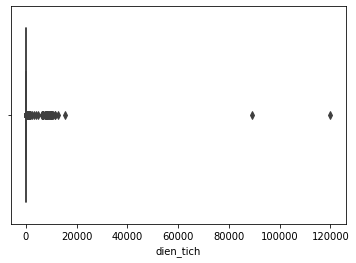

In [21]:
#Kiểm tra và xử lý dữ liệu ngoại lai
plt.rcParams["figure.figsize"] = (6,4)
sns.boxplot(x=at_data_new['dien_tich'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


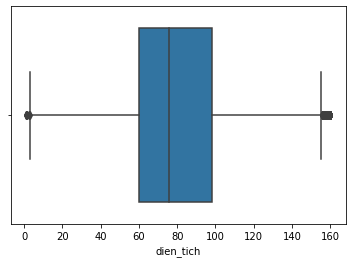

In [22]:
at_data_new = outliner_remove(at_data_new, 'dien_tich')
at_data_new = at_data_new[at_data_new.dien_tich >0]
at_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=at_data_new['dien_tich'])

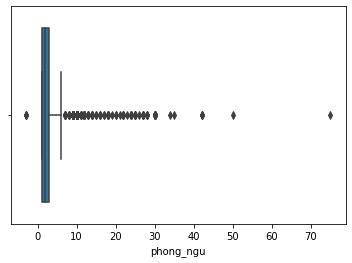

In [23]:
sns.boxplot(x=at_data_new['phong_ngu'])

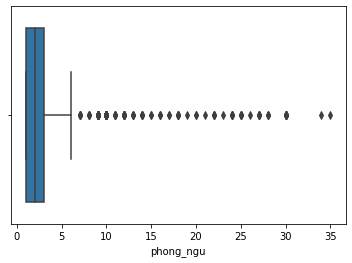

In [24]:
at_data_new = at_data_new[at_data_new['phong_ngu'] <40]
at_data_new = at_data_new[at_data_new['phong_ngu'] >0]
at_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=at_data_new['phong_ngu'])

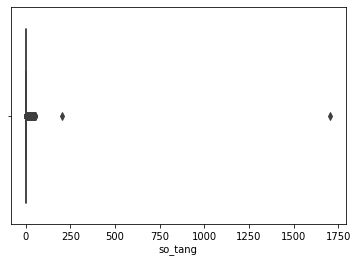

In [25]:
#Kiểm tra và xử lý dữ liệu ngoại lai
sns.boxplot(x=at_data_new['so_tang'])

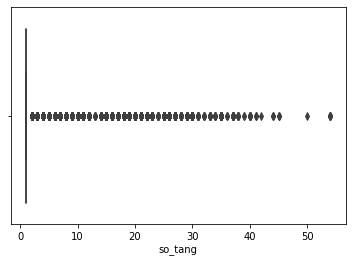

In [26]:
at_data_new = at_data_new[at_data_new['so_tang'] <100]
at_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=at_data_new['so_tang'])

In [27]:
at_data_new['the_loai'] = 'Apartment'

In [28]:
at_data_new

,dien_tich,phong_ngu,so_tang,so_do,ten_quan,huong_nha,do_rong_duong,do_rong_duong_ml,noi_that,gia,the_loai
0,75.0,2.0,1.0,có,Quận Ba Đình,KXĐ,0.0,không,trống,6300.000,Apartment
1,115.0,3.0,1.0,có,Quận Ba Đình,Tây Bắc,0.0,không,trống,10250.000,Apartment
2,100.0,2.0,1.0,có,Quận Ba Đình,Nam,0.0,không,trống,2600.000,Apartment
3,30.0,2.0,2.0,có,Quận Ba Đình,KXĐ,0.0,không,trống,3500.000,Apartment
4,72.0,2.0,3.0,có,Quận Ba Đình,Đông,0.0,không,trống,1750.000,Apartment
...,...,...,...,...,...,...,...,...,...,...,...
30564,35.0,1.0,1.0,không,Quận Bắc Từ Liêm,KXĐ,0.0,không,trống,550.000,Apartment
30565,122.0,4.0,1.0,không,Quận Bắc Từ Liêm,KXĐ,0.0,không,trống,11.000,Apartment
30566,72.0,2.0,1.0,không,Quận Bắc Từ Liêm,KXĐ,0.0,không,trống,9.000,Apartment
30567,54.0,2.0,1.0,không,Huyện Mê Linh,KXĐ,0.0,không,trống,432.000,Apartment


In [29]:
# cols = ['dien_tich','phong_ngu','so_tang','so_do','ten_quan','huong_nha','do_rong_duong','do_rong_duong_ml','noi_that','gia']
# for i in cols:
#   sns.displot(data=at_data_new, x=i, kde=True)

#LandTrading data

In [30]:
lt_data = pd.read_csv("/content/drive/MyDrive/Data DA/LandTrading.csv", encoding='utf8').iloc[:, 1:]
lt_data

,dien_tich,huong_ban_cong,phong_ngu,id_thanh_pho,ten_thanh_pho,id_quan,ten_quan,so_tang,mat_tien,noi_that,...,gia,gia_m2,du_an,project_name,id_duong,ten_duong,do_rong_duong,do_rong_duong_ml,id_phuong,ten_phuong
0,220.0,NaN,1.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,1.0,NaN,NaN,...,30000.0,136.363636,NaN,NaN,5e958ee8208d0d6d7648f9cc,Phố Linh Lang,10.0,Ngõ 4 ô tô tránh,5e5501cbeb80a7245175e0e4,Phường Cống Vị
1,500.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,NaN,NaN,NaN,...,195000.0,390.000000,NaN,NaN,5e958ee8208d0d6d7648f96d,Đường Cao Bá Quát,40.0,Ngõ 4 ô tô trở lên,5e5501cbeb80a7245175e0e9,Phường Điện Biên
2,154.0,NaN,1.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,1.0,NaN,NaN,...,40000.0,259.740260,NaN,NaN,5e958ee8208d0d6d7648f978,Đường Đội Cấn,20.0,Ngõ 4 ô tô trở lên,5e5501cbeb80a7245175e0ea,Phường Đội Cấn
3,116.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,NaN,NaN,NaN,...,14300.0,123.275862,NaN,NaN,5e958ee8208d0d6d7648f974,Đường Đào Tấn,8.0,Ngõ 3 ô tô tránh,5e5501cbeb80a7245175e0e4,Phường Cống Vị
4,195.0,NaN,1.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,1.0,NaN,NaN,...,26500.0,135.897436,NaN,NaN,5e958ee8208d0d6d7648f97a,Đường Giang Văn Minh,100.0,Ngõ 4 ô tô trở lên,5e5501cbeb80a7245175e0ec,Phường Kim Mã
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27249,72.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175dedd,Huyện Phú Xuyên,NaN,NaN,NaN,...,670.0,9.305556,NaN,NaN,NaN,NaN,NaN,NaN,5e5501cceb80a7245175e2e5,Xã Hoàng Long
27250,90.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175dedd,Huyện Phú Xuyên,NaN,NaN,NaN,...,800.0,8.888889,NaN,NaN,5e958eef208d0d6d76490f18,Đường Quốc lộ 1A,NaN,NaN,5e5501cceb80a7245175e2e4,Xã Hồng Thái
27251,100.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175dedd,Huyện Phú Xuyên,NaN,8.0,NaN,...,NaN,NaN,NaN,NaN,5e958eef208d0d6d76490f1c,Đường Tỉnh lộ 428,NaN,NaN,5e5501cceb80a7245175e2ed,Xã Phúc Tiến
27252,100.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175dedd,Huyện Phú Xuyên,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5e5501cceb80a7245175e2db,Thị trấn Phú Xuyên


In [31]:
print("Trước: ",lt_data.ten_quan.unique())
at_data["ten_quan"].replace({"Hà Đông": "Quận Hà Đông",
                             'Sơn Tây':'Thị xã Sơn Tây',
                             'Đan Phượng':'Huyện Đan Phượng',
                             'Quốc Oai':'Huyện Quốc Oai',
                             'Thạch Thất':'Huyện Thạch Thất',
                             'Thường Tín':'Huyện Thường Tín',
                             'Tây Hồ':'Quận Tây Hồ',
                             'Long Biên':'Quận Long Biên',
                             'Đống Đa':'Quận Đống Đa',
                             'Hai Bà Trưng':'Quận Hai Bà Trưng',
                             'Hoàng Mai':'Quận Hoàng Mai',
                             'Thanh Xuân':'Quận Thanh Xuân',
                             'Sóc Sơn':'Huyện Sóc Sơn',
                             'Nam Từ Liêm':'Quận Nam Từ Liêm',
                             'Thanh Trì':'Huyện Thanh Trì',
                             'Bắc Từ Liêm':'Quận Bắc Từ Liêm',
                             'Phú Xuyên':'Huyện Phú Xuyên'}
                      , inplace=True)
print("Sau: ",at_data.ten_quan.unique())

Trước:  ['Quận Ba Đình' 'Quận Hà Đông' 'Hà Đông' 'Thị xã Sơn Tây' 'Sơn Tây'
 'Huyện Ba Vì' 'Huyện Phúc Thọ' 'Huyện Đan Phượng' 'Đan Phượng'
 'Huyện Hoài Đức' 'Huyện Quốc Oai' 'Quốc Oai' 'Huyện Thạch Thất'
 'Thạch Thất' 'Huyện Chương Mỹ' 'Huyện Thanh Oai' 'Huyện Thường Tín'
 'Thường Tín' 'Quận Hoàn Kiếm' 'Huyện Ứng Hòa' 'Huyện Mỹ Đức'
 'Quận Tây Hồ' 'Tây Hồ' 'Quận Long Biên' 'Long Biên' 'Quận Cầu Giấy'
 'Quận Đống Đa' 'Đống Đa' 'Quận Hai Bà Trưng' 'Hai Bà Trưng' 'Hoàng Mai'
 'Quận Hoàng Mai' 'Quận Thanh Xuân' 'Thanh Xuân' 'Huyện Sóc Sơn' 'Sóc Sơn'
 'Huyện Đông Anh' 'Huyện Gia Lâm' 'Nam Từ Liêm' 'Quận Nam Từ Liêm'
 'Thanh Trì' 'Huyện Thanh Trì' 'Quận Bắc Từ Liêm' 'Bắc Từ Liêm'
 'Huyện Mê Linh' 'Huyện Phú Xuyên' 'Phú Xuyên']
Sau:  ['Quận Ba Đình' 'Quận Hà Đông' 'Huyện Ba Vì' 'Huyện Đan Phượng'
 'Huyện Hoài Đức' 'Quận Hoài Đức' 'Huyện Quốc Oai' 'Huyện Thạch Thất'
 'Huyện Chương Mỹ' 'Huyện Thanh Oai' 'Huyện Thường Tín' 'Quận Hoàn Kiếm'
 'Quận Tây Hồ' 'Quận Long Biên' 'Quận Cầu Giấy' 'Quận Đ

In [32]:
print("Trước: ",lt_data.huong_nha.unique())
lt_data["huong_nha"].replace({"Tây-Bắc": "Tây Bắc", 
                       "Đông-Nam": "Đông nam", 
                       "Đông-Bắc": "Đông Bắc", 
                       "Tây-Nam": "Tây Nam",}
                      , inplace=True)
print("Sau: ",lt_data.huong_nha.unique())

Trước:  [nan 'Đông' 'Đông Nam' 'KXĐ' 'Tây' 'Đông Bắc' 'Tây Nam' 'Bắc' 'Nam'
 'Tây-Bắc' 'Đông-Bắc' 'Tây-Nam' 'Đông-Nam' 'Tây Bắc' 'Đông nam']
Sau:  [nan 'Đông' 'Đông Nam' 'KXĐ' 'Tây' 'Đông Bắc' 'Tây Nam' 'Bắc' 'Nam'
 'Tây Bắc' 'Đông nam']


In [33]:
replaceNAN(lt_data, 'so_do', 'không')

Cột ' so_do ' đã chuyển đổi 12566 giá trị nan thành: không


In [34]:
for i in lt_data['so_do'].unique():
  if i != "không":
    lt_data["so_do"].replace({i: "có"}, inplace=True)
    print("Chuyển ",i," Thành công")
lt_data["so_do"].unique()

Chuyển  Sổ hồng/ Sổ đỏ  Thành công
Chuyển  Sổ đỏ  Thành công
Chuyển  Giấy tờ hợp lệ  Thành công
Chuyển  Sổ hồng  Thành công
Chuyển  Sổ đỏ chính chủ  Thành công
Chuyển  Sổ đỏ chính chủ.  Thành công
Chuyển  Có sổ đỏ  Thành công
Chuyển  Đã có sổ đỏ  Thành công
Chuyển  Đã có sổ  Thành công
Chuyển  Sổ đỏ.  Thành công
Chuyển  Có sổ  Thành công
Chuyển  Sổ đỏ chính chủ, nở hậu, sẵn sàng giao dịch.  Thành công
Chuyển  Sổ đỏ vuông đẹp sẵn sàng giao dịch  Thành công
Chuyển  Sổ chính chủ vuông đẹp  Thành công
Chuyển  Hồ sơ pháp lý đầy đủ.  Thành công
Chuyển  Sổ đỏ chính chủ, pháp lý sạch đẹp.  Thành công
Chuyển  Sổ đỏ chính chủ, pháp lý chuẩn.  Thành công
Chuyển  Hồ sơ văn tự  Thành công
Chuyển  Sổ đỏ sẵn sàng  Thành công
Chuyển  Sổ đỏ, pháp lý đầy đủ, minh bạch.  Thành công
Chuyển  Sổ đỏ đầy đủ.  Thành công
Chuyển  Sổ đỏ chính chủ sẵn sàng giao dịch.  Thành công
Chuyển  Đã có sổ đỏ, vuông vắn, nở hậu  Thành công
Chuyển  Sổ đỏ vuông vắn chính chủ, pháp lý rõ ràng, quy hoạch ổn định.  Thành 

array(['có', 'không'], dtype=object)

In [35]:
lt_data['noi_that'] = lt_data['noi_that'].fillna('trống')
for i in lt_data['noi_that']:
  if i != "trống":
    if "tặng" in i:
      lt_data["noi_that"].replace({i: "tặng"}, inplace=True)
      print("Chuyển ",i," Thành công")
    elif "Tặng" in i:
      lt_data["noi_that"].replace({i: "tặng"}, inplace=True)
      print("Chuyển ",i," Thành công")
    elif "cao cấp" in i:
      lt_data["noi_that"].replace({i: "cao cấp"}, inplace=True)
      print("Chuyển ",i," Thành công")
    elif "Cao cấp" in i:
      lt_data["noi_that"].replace({i: "cao cấp"}, inplace=True)
      print("Chuyển ",i," Thành công")
    else:
      lt_data["noi_that"].replace({i: "đầy đủ"}, inplace=True)
      print("Chuyển ",i," Thành công")

Chuyển  Nội thất xịn, sàn gỗ, thiết bị ngoại nhập đầy đủ. Bảo hành trọn đời.  Thành công
Chuyển  Đầy đủ nội thất  Thành công
Chuyển  Bán Đất Tặng nhà.  Thành công
Chuyển  Cách chợ Yên Nghĩa 100m và rất gần chợ Hà Đông, cách bệnh viện Quân Y 103 và BVĐK 16, Thiên Đức chỉ 3km. Gần rất nhiều trường ĐH Top 1 như: HVCN Bưu Chính Viễn Thông, ĐH Kiến Trúc, HVAN, HV Y Dược học  Thành công
Chuyển  Đầy đủ tiện ích Kinh Doanh.  Thành công
Chuyển  Đẹp mới  Thành công
Chuyển  Bán Đất tặng Nhà cấp 4, Kinh Doanh.  Thành công
Chuyển  Nội thất đẹp, sang trọng  Thành công
Chuyển  Đất không  Thành công
Chuyển  Đất  Thành công
Chuyển  Đẹp  Thành công
Chuyển  Cao Cấp, Hiện đại.  Thành công
Chuyển  Khách xác định mua đất  Thành công
Chuyển  Đầy đủ  Thành công
Chuyển  Bán Đất tặng Nhà.  Thành công
Chuyển  ĐẤT KO CÓ GÌ MÔ TẢ  Thành công
Chuyển  đầy đủ  Thành công
Chuyển  đầy đủ  Thành công
Chuyển  Đầy đủ tiện nghi  Thành công
Chuyển  34m2.  Thành công
Chuyển  Full nội thất nhập khẩu từ Châu Âu.  Thành công
Ch

In [36]:
#Dữ liệu để dự đoán giá nhà
lt_data_new = lt_data[['dien_tich','phong_ngu','so_tang','so_do','ten_quan','huong_nha','do_rong_duong','do_rong_duong_ml','noi_that','gia']]

In [37]:
#Loại bỏ giá trị nan có trong giá nhà để dự đoán chính xác hơn
lt_data_new.dropna(subset = ["gia"],inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [38]:
lt_data_new.isna().sum()

dien_tich             103
phong_ngu           21920
so_tang             21715
so_do                   0
ten_quan                0
huong_nha           15821
do_rong_duong       19987
do_rong_duong_ml    19494
noi_that                0
gia                     0
dtype: int64

In [39]:
removeNAN(lt_data_new, 'dien_tich')

replaceNAN(lt_data_new, 'phong_ngu',1)
replaceNAN(lt_data_new, 'so_tang',1)
replaceNAN(lt_data_new, 'huong_nha','KXĐ')
replaceNAN(lt_data_new, 'do_rong_duong',0)
replaceNAN(lt_data_new, 'do_rong_duong_ml','không')
print(lt_data_new.isna().sum())
lt_data_new.reset_index(drop=True, inplace=True)
print("Hiện có:",lt_data_new.shape[0],"dòng")

Cột ' dien_tich ' đã xóa giá trị nan
Cột ' phong_ngu ' đã chuyển đổi 21818 giá trị nan thành: 1
Cột ' so_tang ' đã chuyển đổi 21613 giá trị nan thành: 1
Cột ' huong_nha ' đã chuyển đổi 15731 giá trị nan thành: KXĐ
Cột ' do_rong_duong ' đã chuyển đổi 19888 giá trị nan thành: 0
Cột ' do_rong_duong_ml ' đã chuyển đổi 19399 giá trị nan thành: không
dien_tich           0
phong_ngu           0
so_tang             0
so_do               0
ten_quan            0
huong_nha           0
do_rong_duong       0
do_rong_duong_ml    0
noi_that            0
gia                 0
dtype: int64
Hiện có: 22864 dòng


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


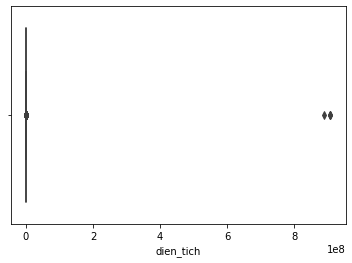

In [40]:
#Kiểm tra và xử lý dữ liệu ngoại lai
sns.boxplot(x=lt_data_new['dien_tich'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


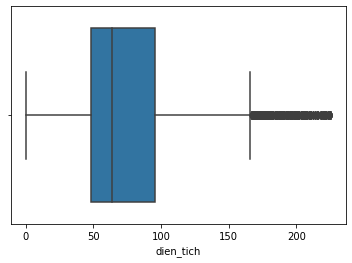

In [41]:
lt_data_new = outliner_remove(lt_data_new, 'dien_tich')
lt_data_new = lt_data_new[lt_data_new.dien_tich >0]
lt_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=lt_data_new['dien_tich'])

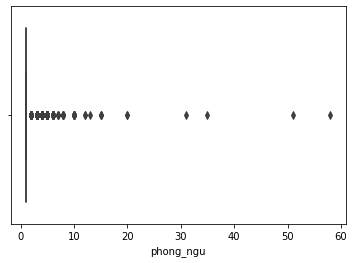

In [42]:
sns.boxplot(x=lt_data_new['phong_ngu'])

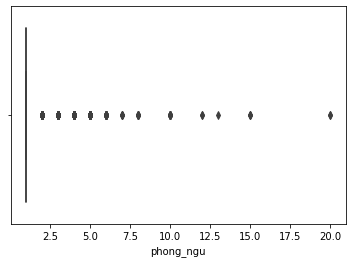

In [43]:
lt_data_new = lt_data_new[lt_data_new.phong_ngu <30]
lt_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=lt_data_new['phong_ngu'])

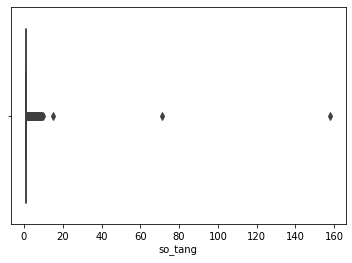

In [44]:
sns.boxplot(x=lt_data_new['so_tang'])

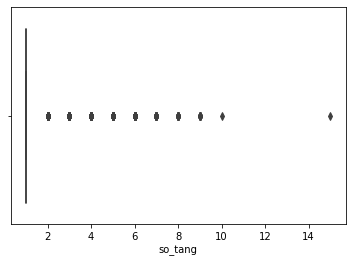

In [45]:
lt_data_new = lt_data_new[lt_data_new.so_tang <60]
lt_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=lt_data_new['so_tang'])

In [46]:
lt_data_new['the_loai'] = 'Land'

In [47]:
lt_data_new

,dien_tich,phong_ngu,so_tang,so_do,ten_quan,huong_nha,do_rong_duong,do_rong_duong_ml,noi_that,gia,the_loai
0,220.0,1.0,1.0,có,Quận Ba Đình,KXĐ,10.0,Ngõ 4 ô tô tránh,trống,30000.00,Land
1,154.0,1.0,1.0,có,Quận Ba Đình,KXĐ,20.0,Ngõ 4 ô tô trở lên,trống,40000.00,Land
2,116.0,1.0,1.0,có,Quận Ba Đình,KXĐ,8.0,Ngõ 3 ô tô tránh,trống,14300.00,Land
3,195.0,1.0,1.0,có,Quận Ba Đình,KXĐ,100.0,Ngõ 4 ô tô trở lên,trống,26500.00,Land
4,100.0,5.0,1.0,có,Quận Ba Đình,KXĐ,0.0,không,trống,5400.00,Land
...,...,...,...,...,...,...,...,...,...,...,...
19822,72.0,1.0,1.0,có,Huyện Phú Xuyên,KXĐ,0.0,không,trống,600.00,Land
19823,120.0,1.0,1.0,có,Huyện Phú Xuyên,KXĐ,0.0,không,trống,554.48,Land
19824,72.0,1.0,1.0,có,Huyện Phú Xuyên,KXĐ,0.0,không,trống,670.00,Land
19825,90.0,1.0,1.0,có,Huyện Phú Xuyên,Nam,0.0,không,trống,800.00,Land


In [48]:
# cols = ['dien_tich','phong_ngu','so_tang','so_do','ten_quan','huong_nha','do_rong_duong','do_rong_duong_ml','noi_that','gia']
# for i in cols:
#   sns.displot(data=lt_data_new, x=i, kde=True)

#RoadSurfaceHouseTrading data

In [49]:
rsht_data = pd.read_csv("/content/drive/MyDrive/Data DA/RoadSurfaceHouseTrading.csv", encoding='utf8').iloc[:, 1:]
rsht_data

,dien_tich,huong_ban_cong,phong_ngu,id_thanh_pho,ten_thanh_pho,id_quan,ten_quan,so_tang,mat_tien,noi_that,...,gia,gia_m2,du_an,project_name,id_duong,ten_duong,do_rong_duong,do_rong_duong_ml,id_phuong,ten_phuong
0,42.0,NaN,2.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,NaN,NaN,3.0,NaN,NaN,...,2250.0,53.571429,NaN,NaN,NaN,NaN,3.0,Mặt phố - Mặt đường,5e5501cbeb80a7245175e1ae,Phường Tây Mỗ
1,220.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,NaN,NaN,NaN,...,61000.0,277.272727,NaN,NaN,NaN,NaN,NaN,Mặt phố - Mặt đường,NaN,NaN
2,69.0,Đông-Nam,9.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,7.0,8.3,"Nhà xây kiên cố, sơn nhà trắng Kova mới sơn lạ...",...,21000.0,304.347826,NaN,NaN,5e958ee8208d0d6d7648f98f,Đường Nguyễn Công Hoan,NaN,Mặt phố - Mặt đường,5e5501cbeb80a7245175e0eb,Phường Ngọc Khánh
3,50.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,5.0,NaN,NaN,...,25000.0,500.000000,NaN,NaN,5e958ee8208d0d6d7648f9ac,Đường Trần Phú,NaN,Mặt phố - Mặt đường,5e5501cbeb80a7245175e0ec,Phường Kim Mã
4,72.0,NaN,5.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,5.0,6.0,NaN,...,12000.0,166.666667,NaN,NaN,5e958ee8208d0d6d7648f974,Đường Đào Tấn,60.0,Ngõ 4 ô tô trở lên,5e5501cbeb80a7245175e0e4,Phường Cống Vị
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62842,80.0,NaN,3.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175dec6,Huyện Mê Linh,3.0,NaN,NaN,...,4500.0,56.250000,NaN,NaN,NaN,NaN,NaN,Mặt phố - Mặt đường,5e5501cceb80a7245175e1e0,Xã Tiền Phong
62843,80.0,NaN,3.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175dec6,Huyện Mê Linh,3.0,NaN,NaN,...,4950.0,61.875000,NaN,NaN,5e958eee208d0d6d76490ae8,Đường Phố Yên,10.0,Mặt phố - Mặt đường,5e5501cceb80a7245175e1e0,Xã Tiền Phong
62844,105.0,NaN,6.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175dec6,Huyện Mê Linh,NaN,5.0,Không NT,...,NaN,NaN,NaN,NaN,5e958eee208d0d6d76490ae7,Đường Ngô Miễn,NaN,Mặt phố - Mặt đường,5e5501cceb80a7245175e1d2,Xã Kim Hoa
62845,70.0,NaN,1.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175dec6,Huyện Mê Linh,1.0,NaN,NaN,...,2400.0,34.285714,NaN,NaN,5e958eee208d0d6d76490aeb,Đường Quốc lộ 23,NaN,Mặt phố - Mặt đường,5e5501cceb80a7245175e1dd,Xã Mê Linh


In [50]:
print("Trước: ",rsht_data.ten_quan.unique())
rsht_data["ten_quan"].replace({'Ba Đình': 'Quận Ba Đình',
                               'Hà Đông':'Quận Hà Đông',
                               'Thường Tín':'Huyện Thường Tín',
                               'Hoàn Kiếm':'Quận Hoàn Kiếm',
                               'Tây Hồ' :'Quận Tây Hồ',
                               'Long Biên':'Quận Long Biên',
                               'Cầu Giấy':'Quận Cầu Giấy',
                               'Đống Đa':'Quận Đống Đa',
                               'Hai Bà Trưng':'Quận Hai Bà Trưng',
                               'Hoàng Mai' :'Quận Hoàng Mai',
                               'Thanh Xuân':'Quận Thanh Xuân',
                               'Nam Từ Liêm':'Quận Nam Từ Liêm',
                               'Bắc Từ Liêm':'Quận Bắc Từ Liêm'}
                      , inplace=True)
print("Sau: ",rsht_data.ten_quan.unique())

Trước:  [nan 'Quận Ba Đình' 'Ba Đình' 'Hà Đông' 'Quận Hà Đông' 'Thị xã Sơn Tây'
 'Huyện Ba Vì' 'Huyện Đan Phượng' 'Huyện Hoài Đức' 'Huyện Quốc Oai'
 'Huyện Thạch Thất' 'Huyện Chương Mỹ' 'Huyện Thanh Oai' 'Huyện Thường Tín'
 'Thường Tín' 'Quận Hoàn Kiếm' 'Hoàn Kiếm' 'Tây Hồ' 'Quận Tây Hồ'
 'Quận Long Biên' 'Long Biên' 'Quận Cầu Giấy' 'Cầu Giấy' 'Quận Đống Đa'
 'Đống Đa' 'Quận Hai Bà Trưng' 'Hai Bà Trưng' 'Hoàng Mai' 'Quận Hoàng Mai'
 'Quận Thanh Xuân' 'Thanh Xuân' 'Huyện Sóc Sơn' 'Huyện Đông Anh'
 'Huyện Gia Lâm' 'Quận Nam Từ Liêm' 'Nam Từ Liêm' 'Huyện Thanh Trì'
 'Quận Bắc Từ Liêm' 'Bắc Từ Liêm' 'Huyện Mê Linh']
Sau:  [nan 'Quận Ba Đình' 'Quận Hà Đông' 'Thị xã Sơn Tây' 'Huyện Ba Vì'
 'Huyện Đan Phượng' 'Huyện Hoài Đức' 'Huyện Quốc Oai' 'Huyện Thạch Thất'
 'Huyện Chương Mỹ' 'Huyện Thanh Oai' 'Huyện Thường Tín' 'Quận Hoàn Kiếm'
 'Quận Tây Hồ' 'Quận Long Biên' 'Quận Cầu Giấy' 'Quận Đống Đa'
 'Quận Hai Bà Trưng' 'Quận Hoàng Mai' 'Quận Thanh Xuân' 'Huyện Sóc Sơn'
 'Huyện Đông Anh' 'Huyện Gi

In [51]:
print("Trước: ",rsht_data.huong_nha.unique())
rsht_data["huong_nha"].replace({"Tây-Bắc": "Tây Bắc", 
                       "Đông-Nam": "Đông nam", 
                       "Đông-Bắc": "Đông Bắc", 
                       "Tây-Nam": "Tây Nam",}
                      , inplace=True)
print("Sau: ",rsht_data.huong_nha.unique())

Trước:  [nan 'Đông-Nam' 'Đông' 'Đông Bắc' 'Tây Bắc' 'Bắc' 'Đông Nam' 'Nam' 'Tây'
 'KXĐ' 'Tây Nam' 'Tây-Nam' 'Đông-Bắc' 'Tây-Bắc' 'Đông nam']
Sau:  [nan 'Đông nam' 'Đông' 'Đông Bắc' 'Tây Bắc' 'Bắc' 'Đông Nam' 'Nam' 'Tây'
 'KXĐ' 'Tây Nam']


In [52]:
replaceNAN(rsht_data, 'so_do', 'không')

Cột ' so_do ' đã chuyển đổi 23273 giá trị nan thành: không


In [53]:
for i in rsht_data['so_do'].unique():
  if i != "không":
    rsht_data["so_do"].replace({i: "có"}, inplace=True)
    print("Chuyển ",i," Thành công")
rsht_data["so_do"].unique()

Chuyển  Giấy đỏ  Thành công
Chuyển  Đã có sổ  Thành công
Chuyển  Đã có sổ hồng  Thành công
Chuyển  Sổ hồng/ Sổ đỏ  Thành công
Chuyển  Sổ đỏ  Thành công
Chuyển  Giấy tờ hợp lệ  Thành công
Chuyển  Có sổ  Thành công
Chuyển  Sổ đỏ chính chủ, pháp lí rõ ràng.  Thành công
Chuyển  Sổ đỏ đẹp nở hậu sẵn sàng giao dịch  Thành công
Chuyển  Sổ đỏ vuông đẹp sẵn sàng giao dịch.  Thành công
Chuyển  Pháp lý cực chuẩn, sổ đỏ chính chủ, nở hậu phong thuỷ quá đẹp, sẵn sàng giao dịch  Thành công
Chuyển  Sổ đỏ chính chủ  Thành công
Chuyển  Sổ đỏ.  Thành công
Chuyển  Sổ đỏ chính chủ vuông vắn nở hậu.  Thành công
Chuyển  Sổ đỏ chính chủ.  Thành công
Chuyển  Pháp lý sạch, không quy hoạch  Thành công
Chuyển  Nhà có sổ đỏ chính chủ vuông vắn và riêng biệt.  Thành công
Chuyển  Sổ đỏ chính chủ, giao dịch ngay  Thành công
Chuyển  Sổ đỏ chính chủ, vuông vắn.  Thành công
Chuyển  Sổ đỏ chính chủ, vuông vắn 1 sổ, 1 chủ.  Thành công
Chuyển  Sổ đỏ vuông đẹp sẵn sàng giao dịch  Thành công
Chuyển  Sổ đỏ chính chủ, pháp lý

array(['có', 'không'], dtype=object)

In [54]:
rsht_data['noi_that'] = rsht_data['noi_that'].fillna('trống')
for i in rsht_data['noi_that']:
  if i != "trống":
    if "tặng" in i:
      rsht_data["noi_that"].replace({i: "tặng"}, inplace=True)
      print("Chuyển ",i," Thành công")
    elif "Tặng" in i:
      rsht_data["noi_that"].replace({i: "tặng"}, inplace=True)
      print("Chuyển ",i," Thành công")
    elif "cao cấp" in i:
      rsht_data["noi_that"].replace({i: "cao cấp"}, inplace=True)
      print("Chuyển ",i," Thành công")
    elif "Cao cấp" in i:
      rsht_data["noi_that"].replace({i: "cao cấp"}, inplace=True)
      print("Chuyển ",i," Thành công")
    else:
      rsht_data["noi_that"].replace({i: "đầy đủ"}, inplace=True)
      print("Chuyển ",i," Thành công")

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Chuyển  cao cấp  Thành công
Chuyển  cao cấp  Thành công
Chuyển  Nội thất cao cấp hiện đại  Thành công
Chuyển  Full nội thất cơ bản liền tường  Thành công
Chuyển  Fulll  Thành công
Chuyển  cao cấp  Thành công
Chuyển  Điều hòa tổng từng tầng. Tầng 1 đến tầng 7 thiết kế thông sàn.  Thành công
Chuyển  Nhập Khẩu.  Thành công
Chuyển  Nội thất đầy đủ.  Thành công
Chuyển  tiện nghi - sang trọng  Thành công
Chuyển  cao cấp  Thành công
Chuyển  đầy đủ  Thành công
Chuyển  Thang Máy  Thành công
Chuyển  Nhập khẩu.  Thành công
Chuyển  Full nội thất.  Thành công
Chuyển  đầy đủ  Thành công
Chuyển  Có thang máy, điều hòa, bếp...  Thành công
Chuyển  đầy đủ  Thành công
Chuyển  đầy đủ  Thành công
Chuyển  Nội thất hiện đại, sang trọng.  Thành công
Chuyển  Đầy đủ công năng  Thành công
Chuyển  Full nội thất văn phòng.  Thành công
Chuyển  Cao cấp.  Thành công
Chuyển  Toàn bộ nội thất xịn  Thành công
Chuyển  cao cấp  Thành công
Chuyển  đầy đủ  Thành côn

In [55]:
rsht_data['noi_that'].unique()

array(['trống', 'đầy đủ', 'cao cấp', 'tặng'], dtype=object)

In [56]:
#Dữ liệu để dự đoán giá nhà
rsht_data_new = rsht_data[['dien_tich','phong_ngu','so_tang','so_do','ten_quan','huong_nha','do_rong_duong','do_rong_duong_ml','noi_that','gia']]
rsht_data_new

,dien_tich,phong_ngu,so_tang,so_do,ten_quan,huong_nha,do_rong_duong,do_rong_duong_ml,noi_that,gia
0,42.0,2.0,3.0,có,NaN,NaN,3.0,Mặt phố - Mặt đường,trống,2250.0
1,220.0,NaN,NaN,có,Quận Ba Đình,NaN,NaN,Mặt phố - Mặt đường,trống,61000.0
2,69.0,9.0,7.0,có,Quận Ba Đình,Đông nam,NaN,Mặt phố - Mặt đường,đầy đủ,21000.0
3,50.0,NaN,5.0,không,Quận Ba Đình,NaN,NaN,Mặt phố - Mặt đường,trống,25000.0
4,72.0,5.0,5.0,có,Quận Ba Đình,NaN,60.0,Ngõ 4 ô tô trở lên,trống,12000.0
...,...,...,...,...,...,...,...,...,...,...
62842,80.0,3.0,3.0,có,Huyện Mê Linh,NaN,NaN,Mặt phố - Mặt đường,trống,4500.0
62843,80.0,3.0,3.0,có,Huyện Mê Linh,NaN,10.0,Mặt phố - Mặt đường,trống,4950.0
62844,105.0,6.0,NaN,có,Huyện Mê Linh,NaN,NaN,Mặt phố - Mặt đường,đầy đủ,NaN
62845,70.0,1.0,1.0,có,Huyện Mê Linh,NaN,NaN,Mặt phố - Mặt đường,trống,2400.0


In [57]:
#Loại bỏ giá trị nan có trong giá nhà để dự đoán chính xác hơn
rsht_data_new.dropna(subset = ["gia"],inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [58]:
rsht_data_new.isna().sum()

dien_tich             227
phong_ngu           24589
so_tang             15197
so_do                   0
ten_quan                1
huong_nha           54496
do_rong_duong       46008
do_rong_duong_ml     2777
noi_that                0
gia                     0
dtype: int64

In [59]:
removeNAN(rsht_data_new, 'dien_tich')
removeNAN(rsht_data_new, 'ten_quan')

replaceNAN(rsht_data_new, 'phong_ngu',1)
replaceNAN(rsht_data_new, 'so_tang',1)
replaceNAN(rsht_data_new, 'huong_nha','KXĐ')
replaceNAN(rsht_data_new, 'do_rong_duong',0)
replaceNAN(rsht_data_new, 'do_rong_duong_ml','không')
print(rsht_data_new.isna().sum())
rsht_data_new.reset_index(drop=True, inplace=True)
print("Hiện có:",rsht_data_new.shape[0],"dòng")

Cột ' dien_tich ' đã xóa giá trị nan
Cột ' ten_quan ' đã xóa giá trị nan
Cột ' phong_ngu ' đã chuyển đổi 24413 giá trị nan thành: 1
Cột ' so_tang ' đã chuyển đổi 15076 giá trị nan thành: 1
Cột ' huong_nha ' đã chuyển đổi 54307 giá trị nan thành: KXĐ
Cột ' do_rong_duong ' đã chuyển đổi 45797 giá trị nan thành: 0
Cột ' do_rong_duong_ml ' đã chuyển đổi 2773 giá trị nan thành: không
dien_tich           0
phong_ngu           0
so_tang             0
so_do               0
ten_quan            0
huong_nha           0
do_rong_duong       0
do_rong_duong_ml    0
noi_that            0
gia                 0
dtype: int64
Hiện có: 60730 dòng


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


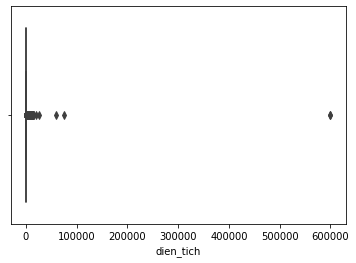

In [60]:
#Kiểm tra và xử lý dữ liệu ngoại lai
sns.boxplot(x=rsht_data_new['dien_tich'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


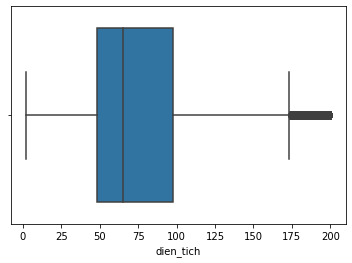

In [61]:
rsht_data_new = outliner_remove(rsht_data_new, 'dien_tich')
rsht_data_new = rsht_data_new[rsht_data_new.dien_tich > 0]
rsht_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=rsht_data_new['dien_tich'])

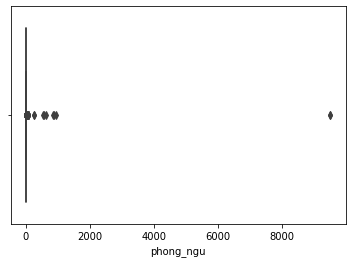

In [62]:
sns.boxplot(x=rsht_data_new['phong_ngu'])

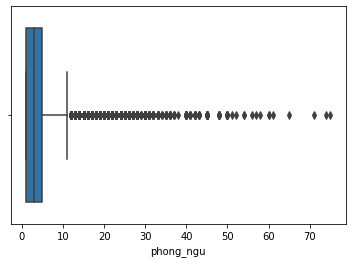

In [63]:
rsht_data_new = rsht_data_new[rsht_data_new.phong_ngu <200]
rsht_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=rsht_data_new['phong_ngu'])

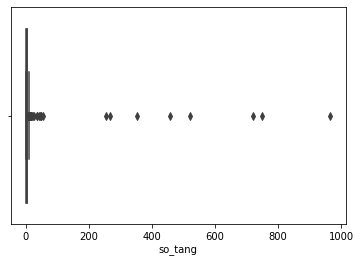

In [64]:
sns.boxplot(x=rsht_data_new['so_tang'])

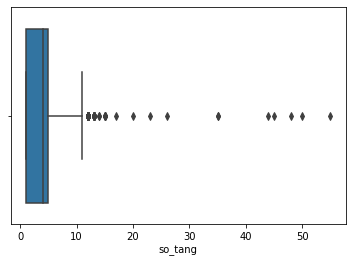

In [65]:
rsht_data_new = rsht_data_new[rsht_data_new.so_tang <200]
rsht_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=rsht_data_new['so_tang'])

In [66]:
rsht_data_new['the_loai'] = 'Road'

In [67]:
rsht_data_new

,dien_tich,phong_ngu,so_tang,so_do,ten_quan,huong_nha,do_rong_duong,do_rong_duong_ml,noi_that,gia,the_loai
0,69.0,9.0,7.0,có,Quận Ba Đình,Đông nam,0.0,Mặt phố - Mặt đường,đầy đủ,21000.0,Road
1,50.0,1.0,5.0,không,Quận Ba Đình,KXĐ,0.0,Mặt phố - Mặt đường,trống,25000.0,Road
2,72.0,5.0,5.0,có,Quận Ba Đình,KXĐ,60.0,Ngõ 4 ô tô trở lên,trống,12000.0,Road
3,50.0,3.0,5.0,không,Quận Ba Đình,KXĐ,4.0,Ngõ 1 ô tô,trống,16000.0,Road
4,50.0,3.0,5.0,không,Quận Ba Đình,KXĐ,4.0,Ngõ 1 ô tô,trống,16000.0,Road
...,...,...,...,...,...,...,...,...,...,...,...
55444,80.0,3.0,3.0,có,Huyện Mê Linh,KXĐ,0.0,Mặt phố - Mặt đường,trống,4500.0,Road
55445,80.0,3.0,3.0,có,Huyện Mê Linh,KXĐ,0.0,Mặt phố - Mặt đường,trống,4500.0,Road
55446,80.0,3.0,3.0,có,Huyện Mê Linh,KXĐ,10.0,Mặt phố - Mặt đường,trống,4950.0,Road
55447,70.0,1.0,1.0,có,Huyện Mê Linh,KXĐ,0.0,Mặt phố - Mặt đường,trống,2400.0,Road


In [68]:
# cols = ['dien_tich','phong_ngu','so_tang','so_do','ten_quan','huong_nha','do_rong_duong','do_rong_duong_ml','noi_that','gia']
# for i in cols:
#   sns.displot(data=rsht_data_new, x=i, kde=True)

#Tổng hợp

In [69]:
data = pd.concat([at_data_new, lt_data_new, rsht_data_new])
mask = data['gia'].apply(lambda x: x.is_integer())
data['gia'] = data['gia'].astype(int)
data = data[mask]

data.reset_index(drop=True, inplace=True)
data

,dien_tich,phong_ngu,so_tang,so_do,ten_quan,huong_nha,do_rong_duong,do_rong_duong_ml,noi_that,gia,the_loai
0,75.0,2.0,1.0,có,Quận Ba Đình,KXĐ,0.0,không,trống,6300,Apartment
1,115.0,3.0,1.0,có,Quận Ba Đình,Tây Bắc,0.0,không,trống,10250,Apartment
2,100.0,2.0,1.0,có,Quận Ba Đình,Nam,0.0,không,trống,2600,Apartment
3,30.0,2.0,2.0,có,Quận Ba Đình,KXĐ,0.0,không,trống,3500,Apartment
4,72.0,2.0,3.0,có,Quận Ba Đình,Đông,0.0,không,trống,1750,Apartment
...,...,...,...,...,...,...,...,...,...,...,...
103356,80.0,3.0,3.0,có,Huyện Mê Linh,KXĐ,0.0,Mặt phố - Mặt đường,trống,4500,Road
103357,80.0,3.0,3.0,có,Huyện Mê Linh,KXĐ,0.0,Mặt phố - Mặt đường,trống,4500,Road
103358,80.0,3.0,3.0,có,Huyện Mê Linh,KXĐ,10.0,Mặt phố - Mặt đường,trống,4950,Road
103359,70.0,1.0,1.0,có,Huyện Mê Linh,KXĐ,0.0,Mặt phố - Mặt đường,trống,2400,Road


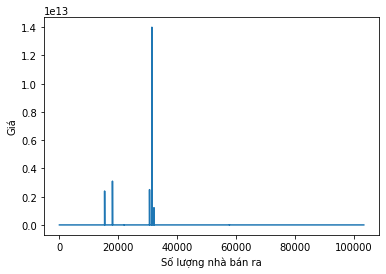

In [70]:
plt.plot(data['gia'])
plt.ylabel('Giá')
plt.xlabel("Số lượng nhà bán ra")
plt.show()

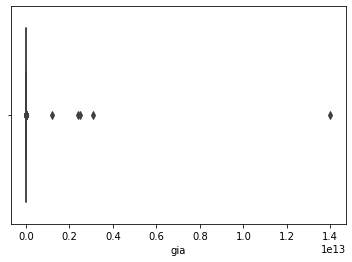

In [71]:
#Kiểm tra và xử lý dữ liệu ngoại lai
plt.rcParams["figure.figsize"] = (6,4)
sns.boxplot(x=data['gia'])

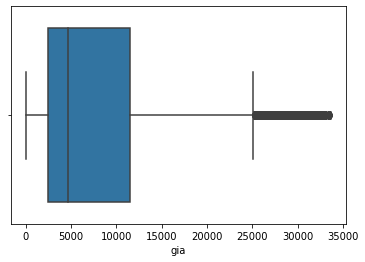

In [72]:
data = outliner_remove(data, 'gia')
data = data[data.gia >0]
data.reset_index(drop=True, inplace=True)
sns.boxplot(x=data['gia'])

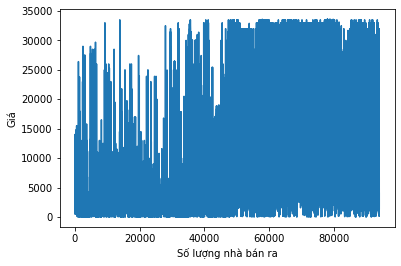

In [73]:
plt.plot(data.gia)
plt.ylabel('Giá')
plt.xlabel("Số lượng nhà bán ra")
plt.show()

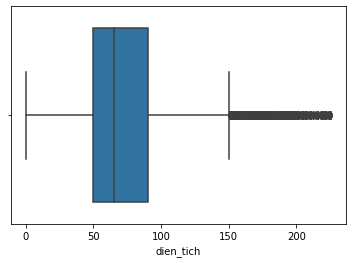

In [74]:
sns.boxplot(x=data['dien_tich'])

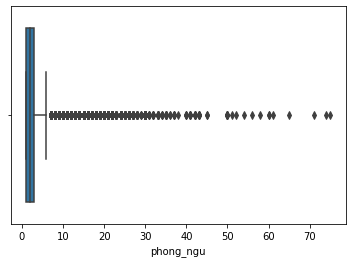

In [75]:
sns.boxplot(x=data['phong_ngu'])

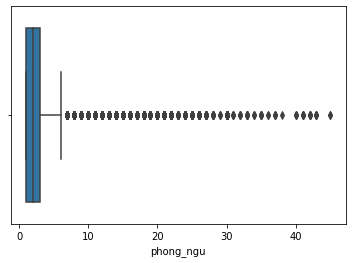

In [76]:
data = data[data.phong_ngu <50]
data.reset_index(drop=True, inplace=True)
sns.boxplot(x=data['phong_ngu'])

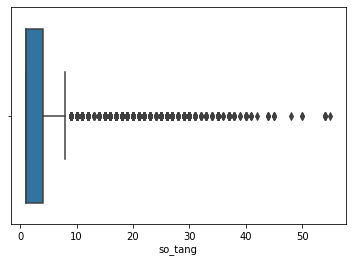

In [77]:
sns.boxplot(x=data['so_tang'])

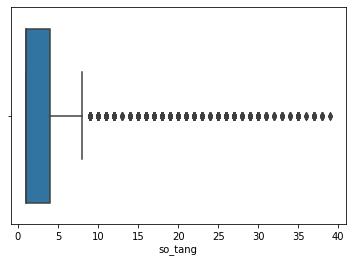

In [78]:
data = data[data.so_tang <40]
data.reset_index(drop=True, inplace=True)
sns.boxplot(x=data['so_tang'])

In [79]:
#data.to_csv("/content/drive/MyDrive/Data DA/data_final.csv")

#Visualize

In [80]:
df = pd.read_csv("/content/drive/MyDrive/Data DA/data_final.csv", encoding='utf8').iloc[:, 1:]
df

,dien_tich,phong_ngu,so_tang,so_do,ten_quan,huong_nha,do_rong_duong,do_rong_duong_ml,noi_that,gia,the_loai
0,75.0,2.0,1.0,có,Quận Ba Đình,KXĐ,0.0,không,trống,6300,Apartment
1,115.0,3.0,1.0,có,Quận Ba Đình,Tây Bắc,0.0,không,trống,10250,Apartment
2,100.0,2.0,1.0,có,Quận Ba Đình,Nam,0.0,không,trống,2600,Apartment
3,30.0,2.0,2.0,có,Quận Ba Đình,KXĐ,0.0,không,trống,3500,Apartment
4,72.0,2.0,3.0,có,Quận Ba Đình,Đông,0.0,không,trống,1750,Apartment
...,...,...,...,...,...,...,...,...,...,...,...
93940,80.0,3.0,3.0,có,Huyện Mê Linh,KXĐ,0.0,Mặt phố - Mặt đường,trống,4500,Road
93941,80.0,3.0,3.0,có,Huyện Mê Linh,KXĐ,0.0,Mặt phố - Mặt đường,trống,4500,Road
93942,80.0,3.0,3.0,có,Huyện Mê Linh,KXĐ,10.0,Mặt phố - Mặt đường,trống,4950,Road
93943,70.0,1.0,1.0,có,Huyện Mê Linh,KXĐ,0.0,Mặt phố - Mặt đường,trống,2400,Road


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93945 entries, 0 to 93944
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dien_tich         93945 non-null  float64
 1   phong_ngu         93945 non-null  float64
 2   so_tang           93945 non-null  float64
 3   so_do             93945 non-null  object 
 4   ten_quan          93945 non-null  object 
 5   huong_nha         93945 non-null  object 
 6   do_rong_duong     93945 non-null  float64
 7   do_rong_duong_ml  93945 non-null  object 
 8   noi_that          93945 non-null  object 
 9   gia               93945 non-null  int64  
 10  the_loai          93945 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 7.9+ MB


In [82]:
loai_nha = df['the_loai'].value_counts()
loai_nha.values

array([46156, 29323, 18466])

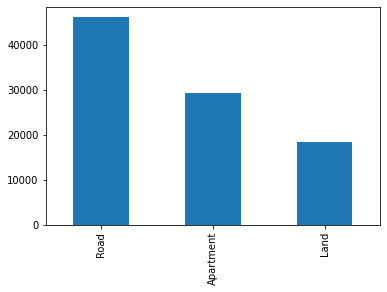

In [83]:
df['the_loai'].value_counts().plot.bar()

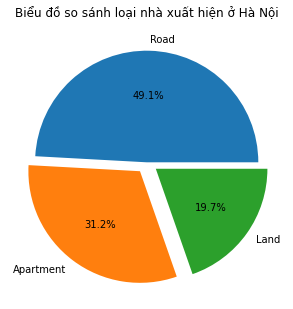

In [84]:
plt.figure(figsize = (5,15))
plt.title('Biểu đồ so sánh loại nhà xuất hiện ở Hà Nội')
plt.pie(loai_nha.values, labels = loai_nha.index, autopct="%1.1f%%",explode=[0, 0.1, 0.1])
plt.show()

In [85]:
rooms_area = df[['the_loai', 'dien_tich', 'phong_ngu']].sort_values(by = 'dien_tich')
rooms_area.reset_index(drop=True, inplace=True)
rooms_area

,the_loai,dien_tich,phong_ngu
0,Land,0.11,1.0
1,Land,0.14,1.0
2,Land,1.00,1.0
3,Land,1.00,1.0
4,Apartment,1.00,1.0
...,...,...,...
93940,Land,225.00,1.0
93941,Land,225.00,1.0
93942,Land,225.00,1.0
93943,Land,225.00,1.0


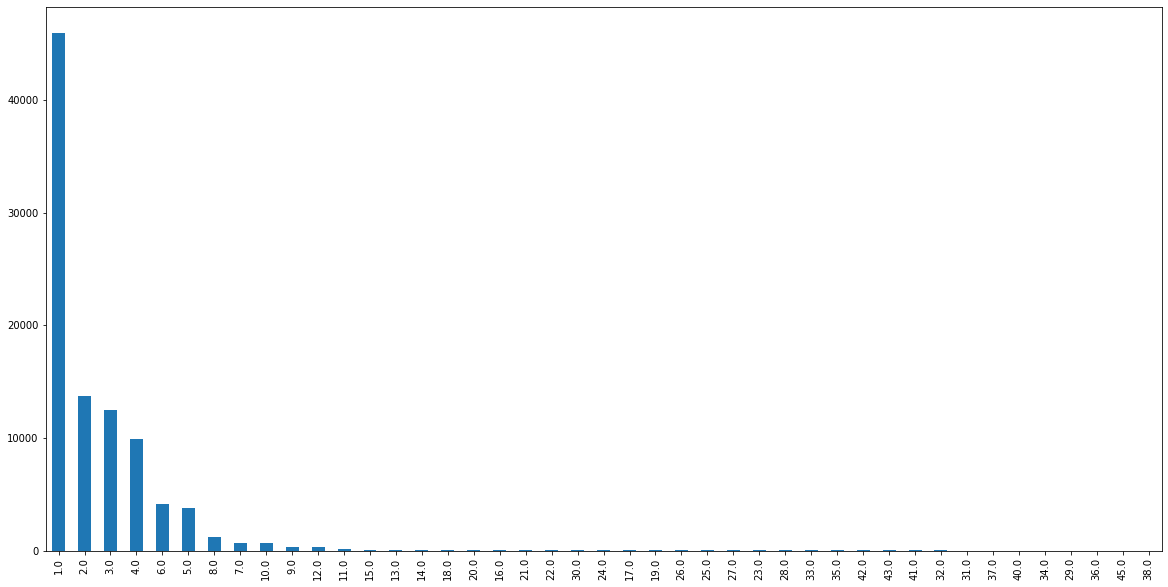

In [86]:
plt.figure(figsize = (20,10))
df['phong_ngu'].value_counts().plot.bar()

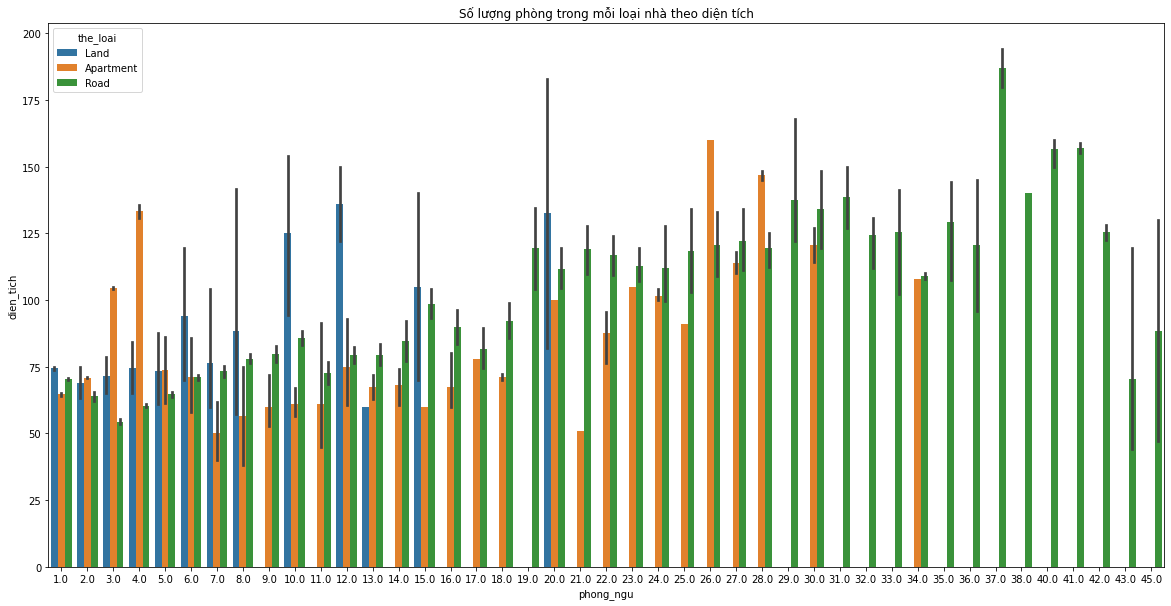

In [87]:
plt.figure(figsize = (20,10))
plt.title('Số lượng phòng trong mỗi loại nhà theo diện tích')
sns.barplot(data = rooms_area, x = 'phong_ngu', y = 'dien_tich', hue = 'the_loai')
plt.show()

In [88]:
gia_avg = df[['the_loai', 'gia']].groupby('the_loai').mean().reset_index()
gia_avg

,the_loai,gia
0,Apartment,2677.726222
1,Land,4438.549821
2,Road,12747.436975


In [89]:
rooms_price = df[['the_loai', 'gia', 'phong_ngu']].sort_values(by = 'gia')
rooms_price.reset_index(drop=True, inplace=True)
rooms_price

,the_loai,gia,phong_ngu
0,Road,1,4.0
1,Land,1,1.0
2,Apartment,1,1.0
3,Apartment,1,2.0
4,Road,1,20.0
...,...,...,...
93940,Road,33600,1.0
93941,Road,33600,3.0
93942,Road,33600,1.0
93943,Road,33600,1.0


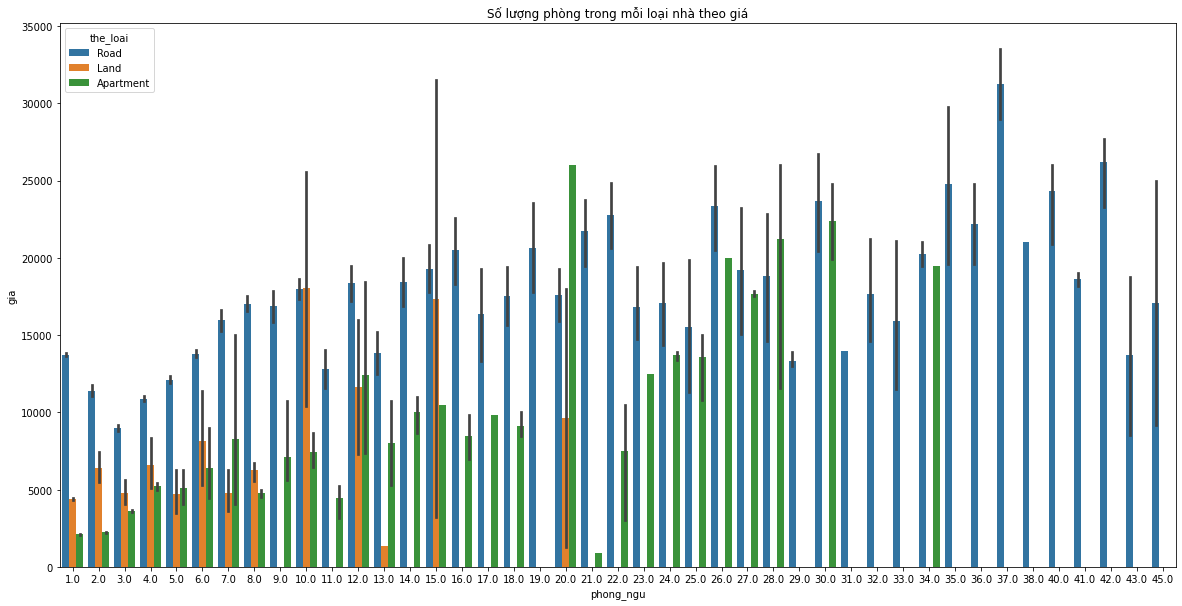

In [90]:
plt.figure(figsize = (20,10))
plt.title('Số lượng phòng trong mỗi loại nhà theo giá')
sns.barplot(data = rooms_price, x = 'phong_ngu', y = 'gia', hue = 'the_loai')
plt.show()

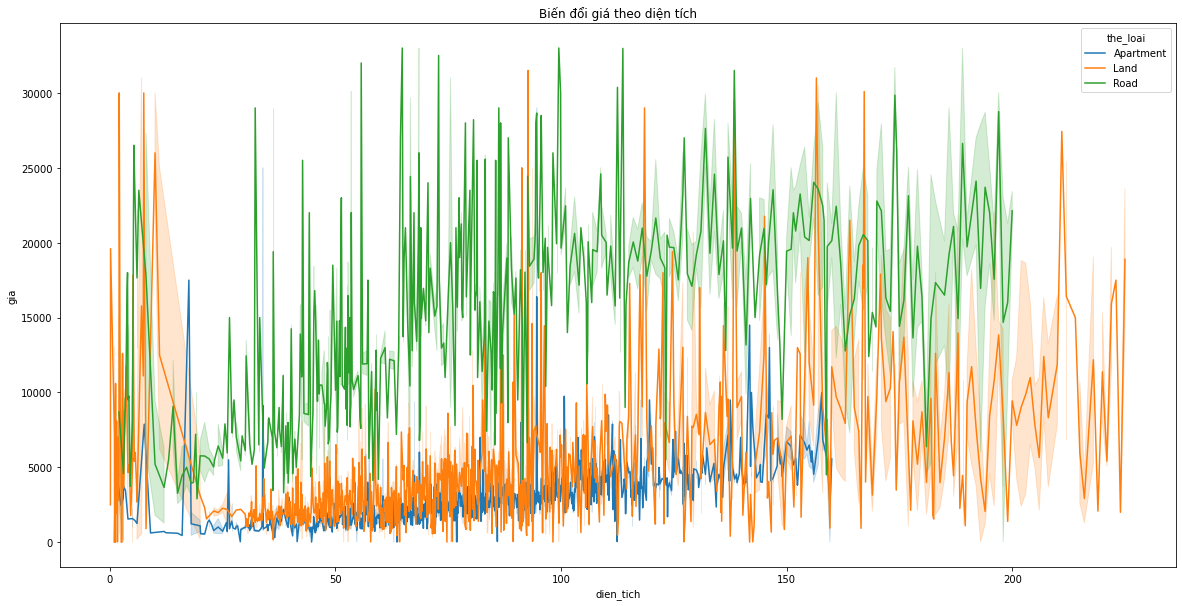

In [91]:
plt.figure(figsize = (20, 10))
plt.title('Biến đổi giá theo diện tích')
sns.lineplot(data = df, x = 'dien_tich', y = 'gia', hue = 'the_loai')
plt.show()

In [92]:
ten_quan_group = df.groupby(['ten_quan'])['gia'].mean().reset_index()
ten_quan_group = df.sort_values(by = 'gia')

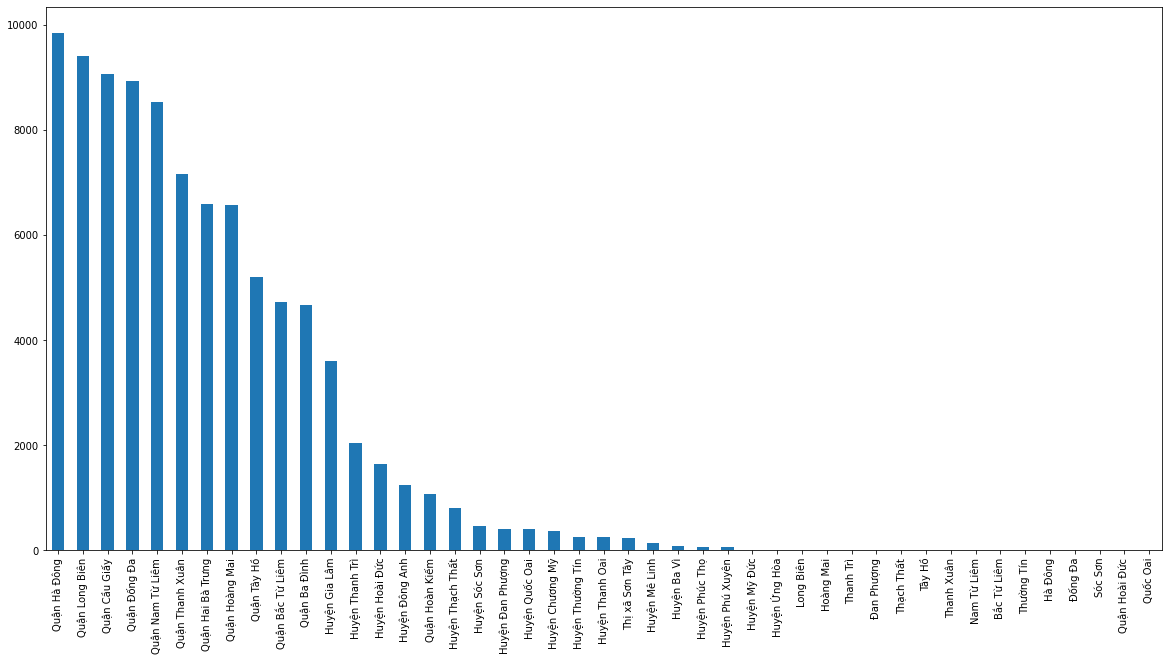

In [93]:
plt.figure(figsize = (20,10))
df['ten_quan'].value_counts().plot.bar()

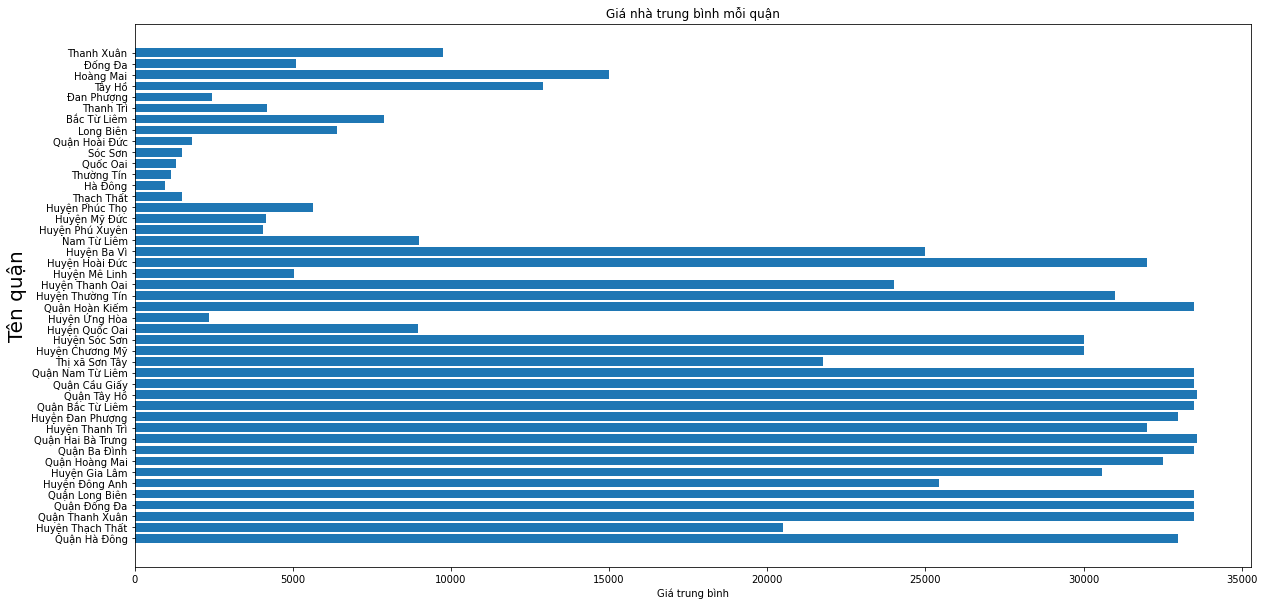

In [94]:
plt.figure(figsize=(20,10))
plt.barh(ten_quan_group['ten_quan'], ten_quan_group['gia'])
plt.title("Giá nhà trung bình mỗi quận")
plt.xlabel("Giá trung bình")
plt.ylabel("Tên quận", fontsize = 20)
plt.show()

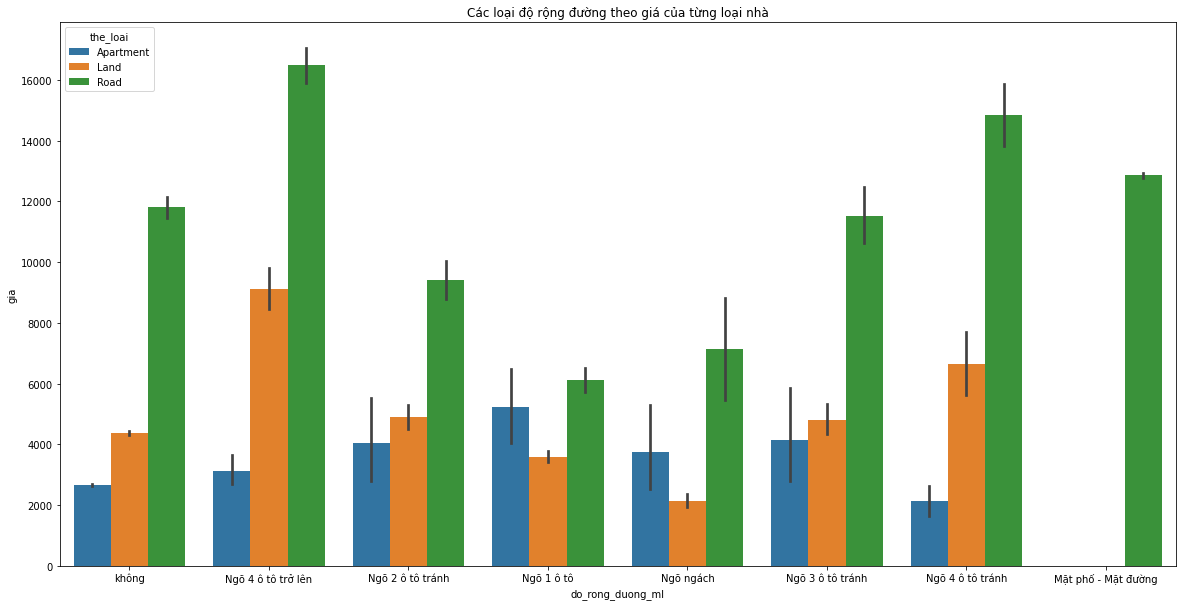

In [95]:
plt.figure(figsize = (20,10))
plt.title("Các loại độ rộng đường theo giá của từng loại nhà")
sns.barplot(data = df, x = 'do_rong_duong_ml', y = 'gia', hue = 'the_loai')
plt.show()

In [96]:
funi_price = df[['the_loai', 'gia', 'noi_that']].sort_values(by = 'gia')
funi_price.reset_index(drop=True, inplace=True)
funi_price

,the_loai,gia,noi_that
0,Road,1,trống
1,Land,1,trống
2,Apartment,1,trống
3,Apartment,1,trống
4,Road,1,trống
...,...,...,...
93940,Road,33600,trống
93941,Road,33600,trống
93942,Road,33600,trống
93943,Road,33600,trống


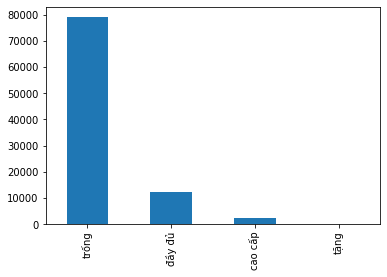

In [97]:
df['noi_that'].value_counts().plot.bar()

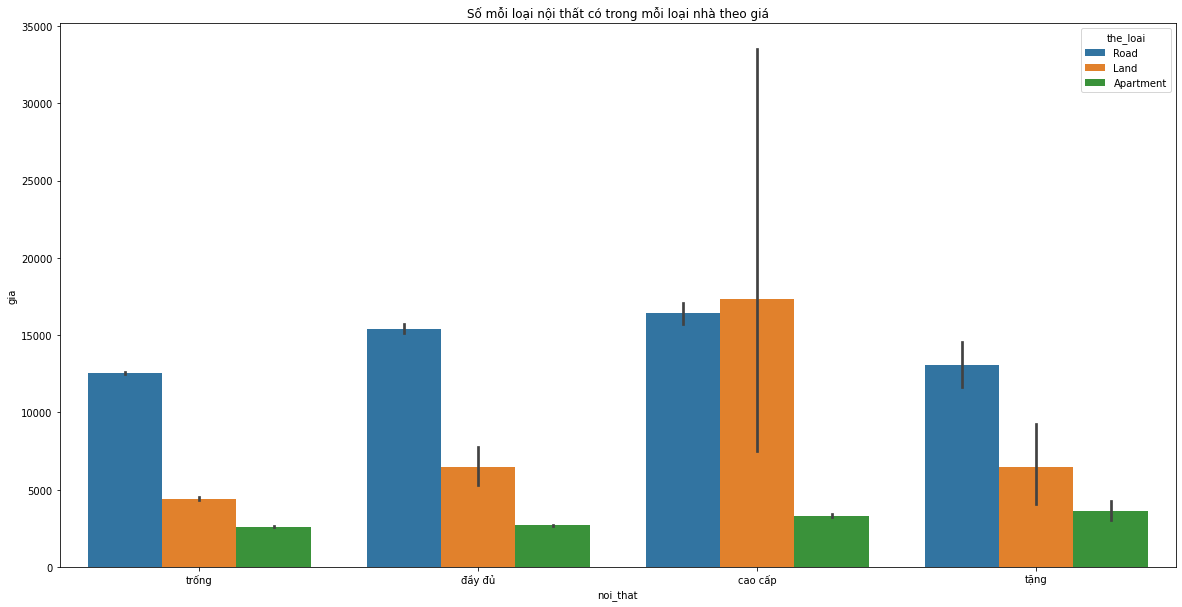

In [98]:
plt.figure(figsize = (20,10))
plt.title('Số mỗi loại nội thất có trong mỗi loại nhà theo giá')
sns.barplot(data = funi_price, x = 'noi_that', y = 'gia', hue = 'the_loai')
plt.show()

In [99]:
sodo_price = df[['the_loai', 'gia', 'so_do']].sort_values(by = 'gia')
sodo_price.reset_index(drop=True, inplace=True)
sodo_price

,the_loai,gia,so_do
0,Road,1,có
1,Land,1,có
2,Apartment,1,không
3,Apartment,1,không
4,Road,1,không
...,...,...,...
93940,Road,33600,không
93941,Road,33600,có
93942,Road,33600,có
93943,Road,33600,không


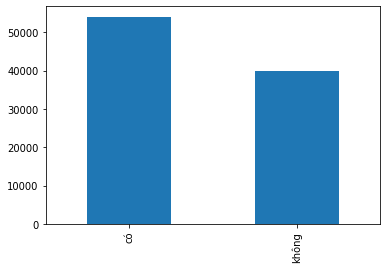

In [100]:
df['so_do'].value_counts().plot.bar()

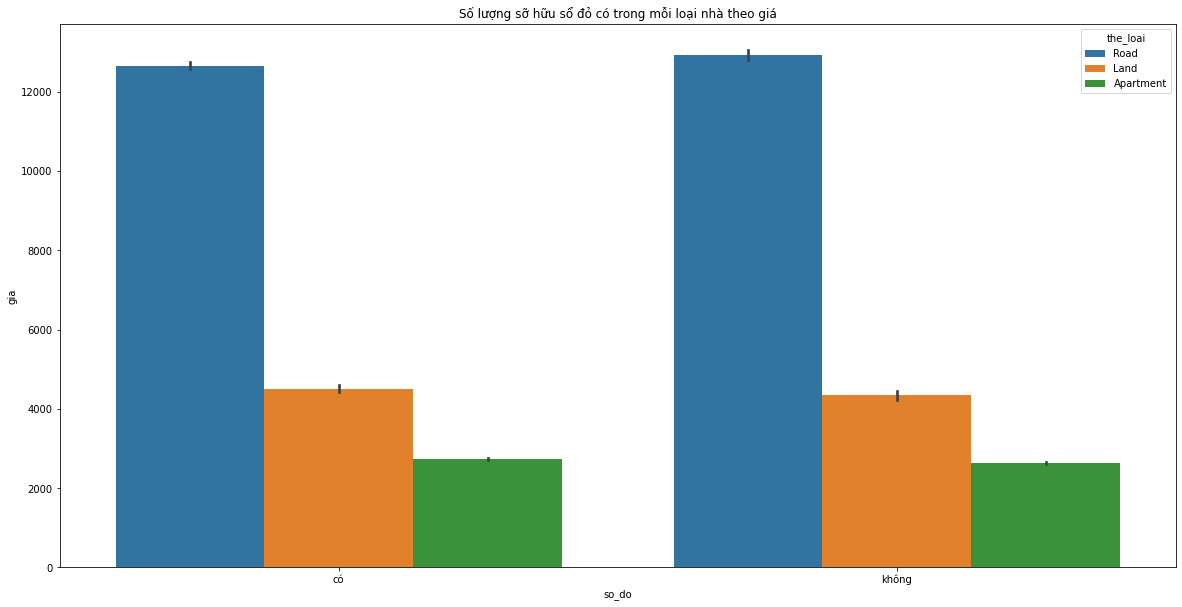

In [101]:
plt.figure(figsize = (20,10))
plt.title('Số lượng sỡ hữu sổ đỏ có trong mỗi loại nhà theo giá')
sns.barplot(data = sodo_price, x = 'so_do', y = 'gia', hue = 'the_loai')
plt.show()

#Set up để Train

In [102]:
data = pd.read_csv("/content/drive/MyDrive/Data DA/data_final.csv", encoding='utf8').iloc[:, 1:]
data

,dien_tich,phong_ngu,so_tang,so_do,ten_quan,huong_nha,do_rong_duong,do_rong_duong_ml,noi_that,gia,the_loai
0,75.0,2.0,1.0,có,Quận Ba Đình,KXĐ,0.0,không,trống,6300,Apartment
1,115.0,3.0,1.0,có,Quận Ba Đình,Tây Bắc,0.0,không,trống,10250,Apartment
2,100.0,2.0,1.0,có,Quận Ba Đình,Nam,0.0,không,trống,2600,Apartment
3,30.0,2.0,2.0,có,Quận Ba Đình,KXĐ,0.0,không,trống,3500,Apartment
4,72.0,2.0,3.0,có,Quận Ba Đình,Đông,0.0,không,trống,1750,Apartment
...,...,...,...,...,...,...,...,...,...,...,...
93940,80.0,3.0,3.0,có,Huyện Mê Linh,KXĐ,0.0,Mặt phố - Mặt đường,trống,4500,Road
93941,80.0,3.0,3.0,có,Huyện Mê Linh,KXĐ,0.0,Mặt phố - Mặt đường,trống,4500,Road
93942,80.0,3.0,3.0,có,Huyện Mê Linh,KXĐ,10.0,Mặt phố - Mặt đường,trống,4950,Road
93943,70.0,1.0,1.0,có,Huyện Mê Linh,KXĐ,0.0,Mặt phố - Mặt đường,trống,2400,Road


In [103]:
print("Giá lớn nhất:", data.gia.max(),
      "\nGiá nhỏ nhất:", data.gia.min())

cols =['so_do','ten_quan','huong_nha','do_rong_duong_ml','noi_that','the_loai']
for i in cols:
  print("\n",i," : ",data[i].unique())

Giá lớn nhất: 33600 
Giá nhỏ nhất: 1

 so_do  :  ['có' 'không']

 ten_quan  :  ['Quận Ba Đình' 'Quận Hà Đông' 'Huyện Ba Vì' 'Huyện Đan Phượng'
 'Huyện Hoài Đức' 'Quận Hoài Đức' 'Huyện Quốc Oai' 'Huyện Chương Mỹ'
 'Huyện Thanh Oai' 'Huyện Thường Tín' 'Quận Hoàn Kiếm' 'Quận Tây Hồ'
 'Quận Long Biên' 'Quận Cầu Giấy' 'Quận Đống Đa' 'Quận Hai Bà Trưng'
 'Quận Hoàng Mai' 'Quận Thanh Xuân' 'Huyện Sóc Sơn' 'Huyện Đông Anh'
 'Huyện Gia Lâm' 'Quận Nam Từ Liêm' 'Huyện Thanh Trì' 'Quận Bắc Từ Liêm'
 'Huyện Mê Linh' 'Hà Đông' 'Thị xã Sơn Tây' 'Huyện Phúc Thọ' 'Đan Phượng'
 'Quốc Oai' 'Huyện Thạch Thất' 'Thạch Thất' 'Thường Tín' 'Huyện Ứng Hòa'
 'Huyện Mỹ Đức' 'Tây Hồ' 'Long Biên' 'Đống Đa' 'Hoàng Mai' 'Thanh Xuân'
 'Sóc Sơn' 'Nam Từ Liêm' 'Thanh Trì' 'Bắc Từ Liêm' 'Huyện Phú Xuyên']

 huong_nha  :  ['KXĐ' 'Tây Bắc' 'Nam' 'Đông' 'Đông Nam' 'Tây' 'Bắc' 'Đông nam' 'Đông Bắc'
 'Tây Nam']

 do_rong_duong_ml  :  ['không' 'Ngõ 4 ô tô trở lên' 'Ngõ 2 ô tô tránh' 'Ngõ 1 ô tô' 'Ngõ ngách'
 'Ngõ 3 ô tô tránh'

In [104]:
dict_so_do = {
    "so_do":{
        "không":1.0,
        "có":2.0
    }}

dict_the_loai = {
    "the_loai":{
        "Apartment":1.0,
        "Land":2.0,
        "Road":3.0
    }}

dict_noi_that = {
    "noi_that":{
        "trống":1.0,
        "cao cấp":2.0,
        "đầy đủ":3.0,
        "tặng": 4.0
    }}

dict_ten_quan = dict(enumerate(data.ten_quan.unique()))
dict_ten_quan = {v: k for k, v in dict_ten_quan.items()}
dict_ten_quan = {
    'ten_quan': dict_ten_quan
}

dict_huong_nha = dict(enumerate(data.huong_nha.unique()))
dict_huong_nha = {v: k for k, v in dict_huong_nha.items()}
dict_huong_nha = {
    'huong_nha': dict_huong_nha
}

dict_do_rong_duong_ml = dict(enumerate(data.do_rong_duong_ml.unique()))
dict_do_rong_duong_ml = {v: k for k, v in dict_do_rong_duong_ml.items()}
dict_do_rong_duong_ml = {
    'do_rong_duong_ml': dict_do_rong_duong_ml
}

for i in [dict_so_do, dict_the_loai, dict_noi_that, dict_ten_quan, dict_huong_nha, dict_do_rong_duong_ml]:
    data.replace(i,inplace=True)

In [105]:
print("so_do: ",data.so_do.unique())
print("the_loai: ",data.the_loai.unique())
print("ten_quan: ",data.ten_quan.unique())
print("huong_nha: ",data.huong_nha.unique())
print("noi_that: ",data.noi_that.unique())
print("do_rong_duong_ml: ",data.do_rong_duong_ml.unique())

so_do:  [2. 1.]
the_loai:  [1. 2. 3.]
ten_quan:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]
huong_nha:  [0 1 2 3 4 5 6 7 8 9]
noi_that:  [1. 2. 3. 4.]
do_rong_duong_ml:  [0 1 2 3 4 5 6 7]


In [106]:
data

,dien_tich,phong_ngu,so_tang,so_do,ten_quan,huong_nha,do_rong_duong,do_rong_duong_ml,noi_that,gia,the_loai
0,75.0,2.0,1.0,2.0,0,0,0.0,0,1.0,6300,1.0
1,115.0,3.0,1.0,2.0,0,1,0.0,0,1.0,10250,1.0
2,100.0,2.0,1.0,2.0,0,2,0.0,0,1.0,2600,1.0
3,30.0,2.0,2.0,2.0,0,0,0.0,0,1.0,3500,1.0
4,72.0,2.0,3.0,2.0,0,3,0.0,0,1.0,1750,1.0
...,...,...,...,...,...,...,...,...,...,...,...
93940,80.0,3.0,3.0,2.0,24,0,0.0,7,1.0,4500,3.0
93941,80.0,3.0,3.0,2.0,24,0,0.0,7,1.0,4500,3.0
93942,80.0,3.0,3.0,2.0,24,0,10.0,7,1.0,4950,3.0
93943,70.0,1.0,1.0,2.0,24,0,0.0,7,1.0,2400,3.0


#Train bằng LinearRegression

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

names = ['dien_tich','phong_ngu','so_tang','so_do','ten_quan','huong_nha','noi_that','do_rong_duong','do_rong_duong_ml','the_loai']
x = data[names]
y = data['gia']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
data_set = x_train, x_test, y_train, y_test
for i in data_set:
  i.reset_index(drop=True, inplace=True)

In [108]:
Linreg = LinearRegression().fit(x_train, y_train)
y_predict=Linreg.predict(x_test)
y_predict

array([ 5634.93935697,  9720.11686649,  6099.47341573, ...,
       10774.42661712,  6207.20955058,  9968.53713647])

In [109]:
y_test

0         3634
1        12900
2           57
3        14000
4        12000
         ...  
18784    26000
18785     4800
18786    13900
18787     9500
18788     6000
Name: gia, Length: 18789, dtype: int64

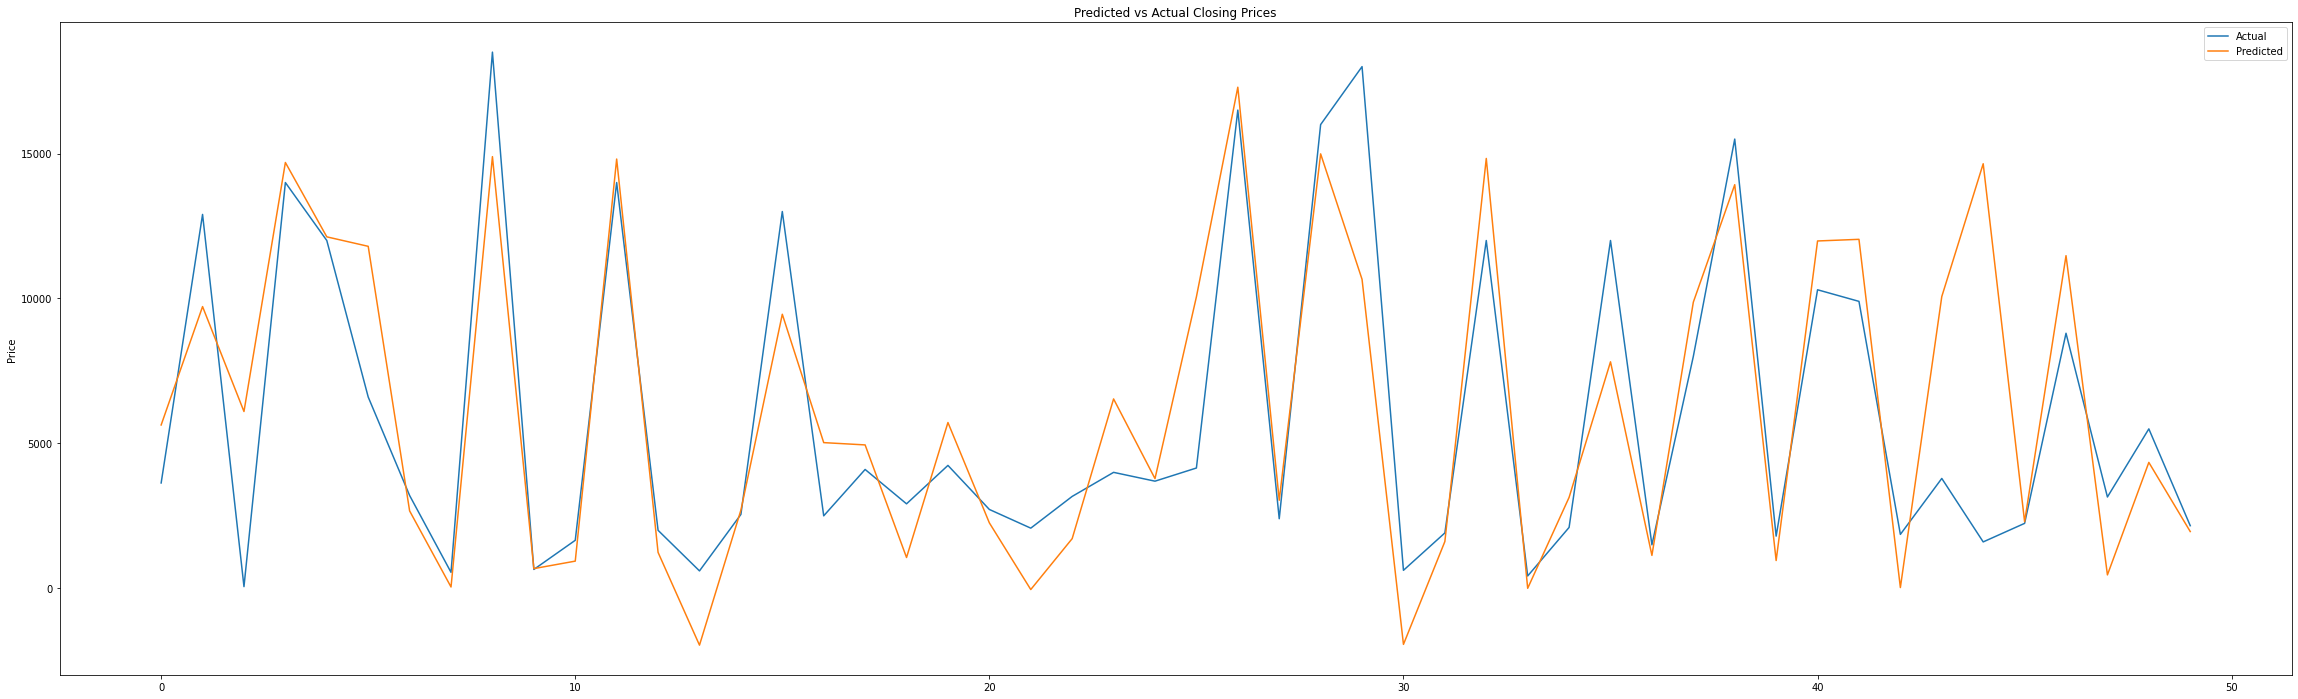

In [110]:
fig = plt.figure() 
fig.set_size_inches(40, 12)
plt.plot(y_test[:50], label='Actual')
plt.plot(y_predict[:50].tolist(), label='Predicted')
plt.title(f"Predicted vs Actual Closing Prices")
plt.ylabel("Price")
plt.legend()
plt.show()

In [111]:
from sklearn.metrics import r2_score 
print ("r2 model: ", r2_score(y_test, y_predict))

r2 model:  0.4987387648665679


#Train bằng DNN

In [112]:
from tensorflow import keras

model = keras.models.Sequential(name="DNN_model")

model.add(keras.layers.Dense(10, activation='relu', input_shape=(10,)))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(1))

for i,layer in enumerate(model.layers):
  layer._name = 'layer_' + str(i)

model.summary()

Model: "DNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 10)                110       
                                                                 
 layer_1 (Dense)             (None, 10)                110       
                                                                 
 layer_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________


In [113]:
opt = keras.optimizers.Adam(learning_rate = 1e-3, decay= 1e-6)

model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
model.fit(x_train, y_train, epochs=30, validation_split=0.1)

Epoch 1/30
2114/2114 [==============================] - 6s 2ms/step - loss: 63406924.0000 - accuracy: 8.8705e-05 - val_loss: 43640428.0000 - val_accuracy: 1.3305e-04
Epoch 2/30
2114/2114 [==============================] - 4s 2ms/step - loss: 38403996.0000 - accuracy: 8.8705e-05 - val_loss: 34776772.0000 - val_accuracy: 1.3305e-04
Epoch 3/30
2114/2114 [==============================] - 4s 2ms/step - loss: 33738376.0000 - accuracy: 8.8705e-05 - val_loss: 32744320.0000 - val_accuracy: 1.3305e-04
Epoch 4/30
2114/2114 [==============================] - 4s 2ms/step - loss: 32358198.0000 - accuracy: 8.8705e-05 - val_loss: 31809320.0000 - val_accuracy: 1.3305e-04
Epoch 5/30
2114/2114 [==============================] - 4s 2ms/step - loss: 31623558.0000 - accuracy: 8.8705e-05 - val_loss: 31215654.0000 - val_accuracy: 1.3305e-04
Epoch 6/30
2114/2114 [==============================] - 4s 2ms/step - loss: 31122762.0000 - accuracy: 8.8705e-05 - val_loss: 30752284.0000 - val_accuracy: 1.3305e-04
Epoc

In [114]:
y_predict= model.predict(x_test, batch_size=1)

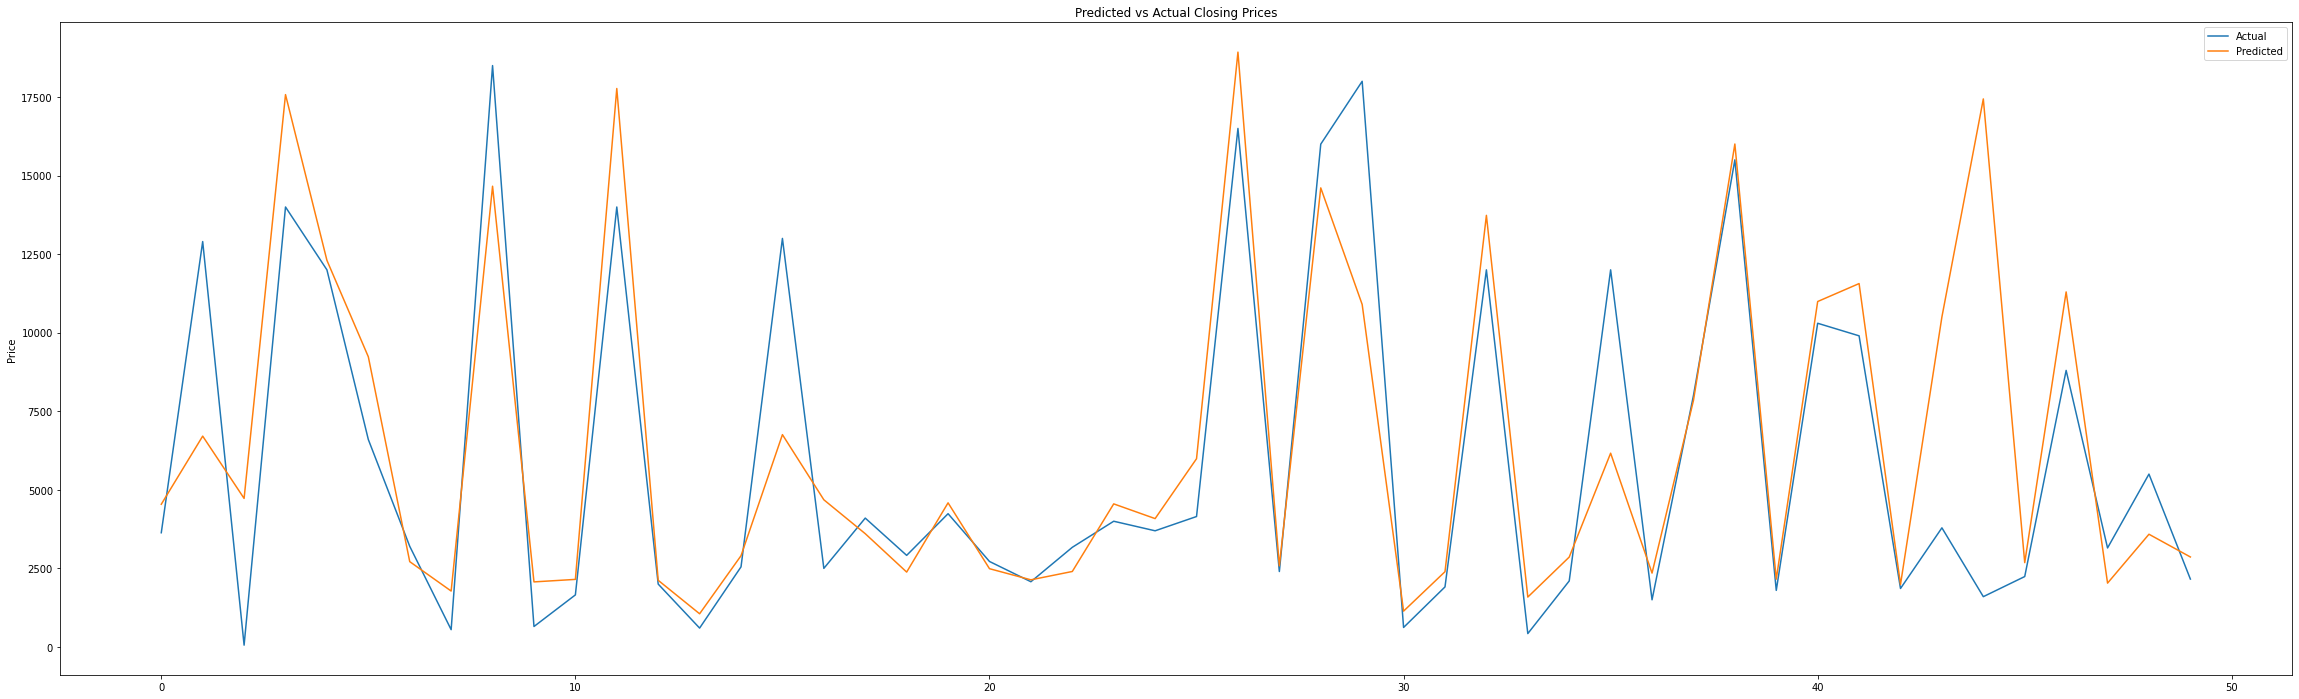

In [116]:
fig = plt.figure() 
fig.set_size_inches(40, 12)
plt.plot(y_test[:50], label='Actual')
plt.plot(y_predict[:50].tolist(), label='Predicted')
plt.title(f"Predicted vs Actual Closing Prices")
plt.ylabel("Price")
plt.legend()
plt.show()